# KITTI VERISI ILE EĞITIM YAPILMASI

# Pretrain deep learning

1.ana cnn aginin zamana bagli egitilmesi basligina kadar calistirilmali.
Bu ilk kısım zamana bağlı eğitim veri setinin oluşturulması Kfold eğitimden sonra kullanılacktır.

2.sonra k fold cnn traraining başlığı çalıştırılmalıdır.

In [127]:
!nvidia-smi

Sat Jan  7 00:44:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.56       Driver Version: 527.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   44C    P8    31W / 240W |   7640MiB /  8192MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Kutulanmış Lidar Verisinin Okunması

In [128]:
import numpy as np
import matplotlib.pyplot as plt

def readBinDataset(filename):
    binDataset = np.load(filename, allow_pickle=True)
    #print(bin)

    return binDataset

# Tüm veri setinin okunması aşağıdadır

In [129]:
total_dataset_sz = 11 # bu dizi olarak ayarlanacak
distributed_time = 5
binDataset_ = []

In [130]:
#windows
for sequence in range(total_dataset_sz):
    binDataset_.append(readBinDataset(r"D:\Ara\numpy_dataset_sequences\%02d_angleBin.npy" % sequence))
    binDataset_[sequence]=binDataset_[sequence].reshape((len(binDataset_[sequence]), 3601,1 ))
    binDataset_[sequence] = np.array([ consec_frames for consec_frames in zip(binDataset_[sequence][0::], binDataset_[sequence][1::])])

# linux
#binDataset=readBinDataset("/mnt/d/Ara/numpy_dataset_sequences/%02d_angleBin.npy" % sequence)

In [131]:
len(binDataset_),  binDataset_[0].shape

(11, (4540, 2, 3601, 1))

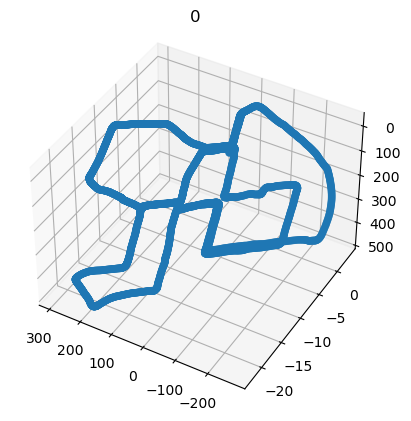

<Figure size 640x480 with 0 Axes>

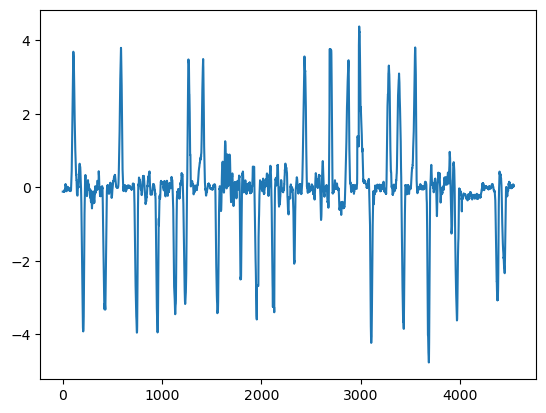

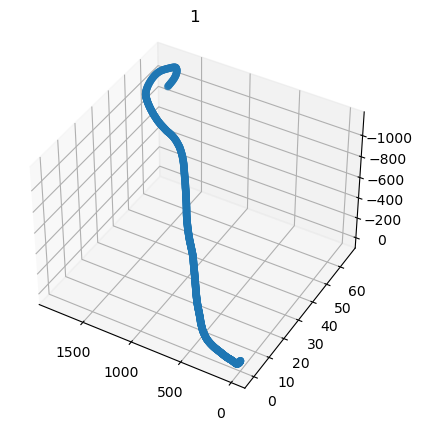

<Figure size 640x480 with 0 Axes>

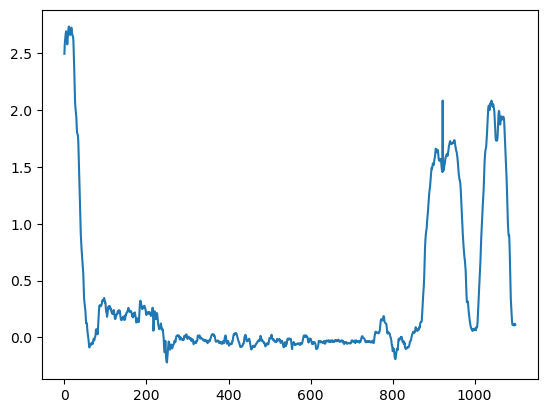

<Figure size 640x480 with 0 Axes>

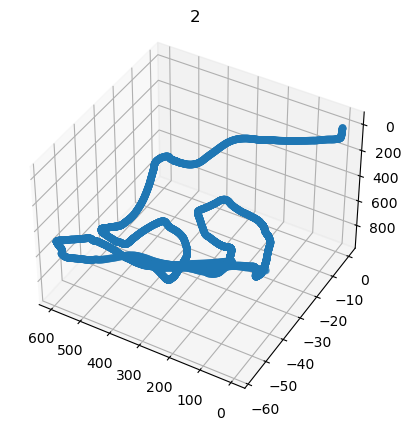

<Figure size 640x480 with 0 Axes>

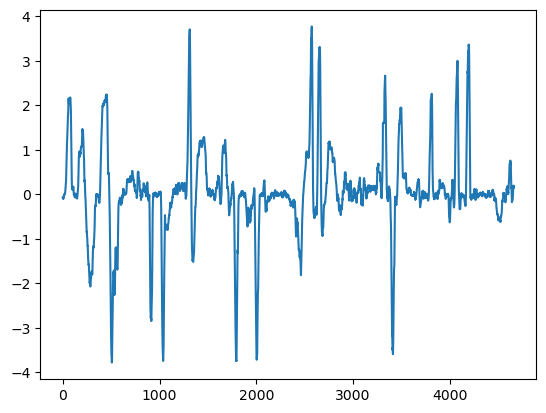

<Figure size 640x480 with 0 Axes>

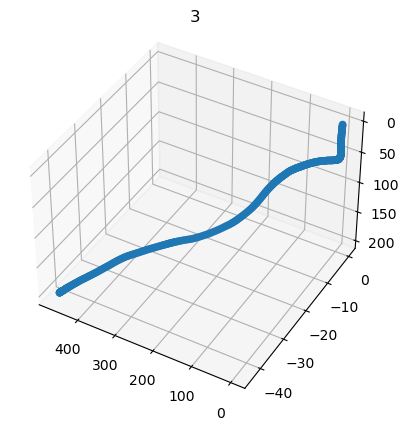

<Figure size 640x480 with 0 Axes>

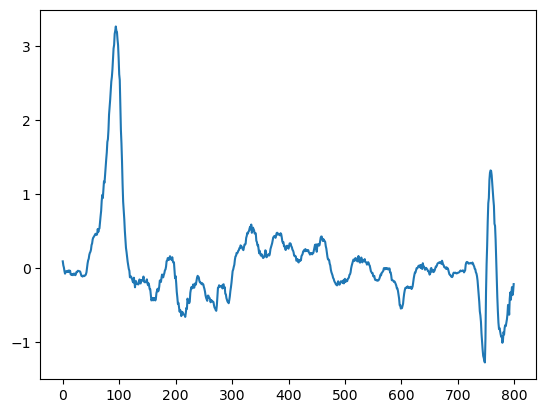

<Figure size 640x480 with 0 Axes>

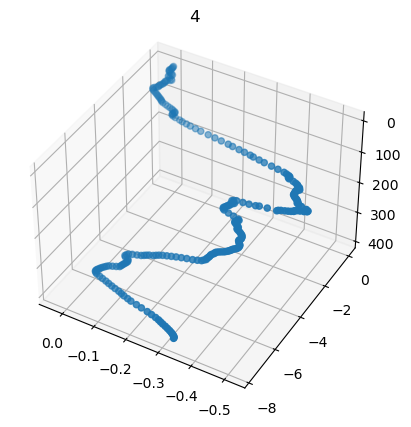

<Figure size 640x480 with 0 Axes>

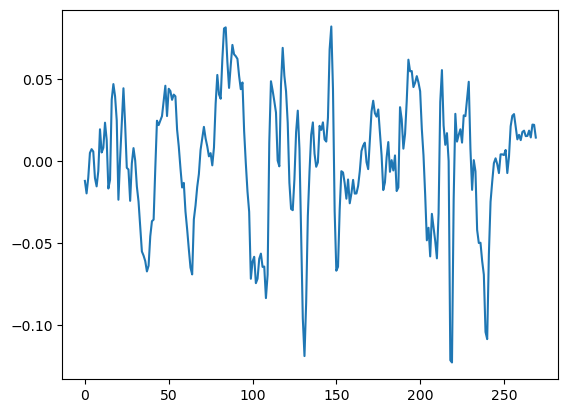

<Figure size 640x480 with 0 Axes>

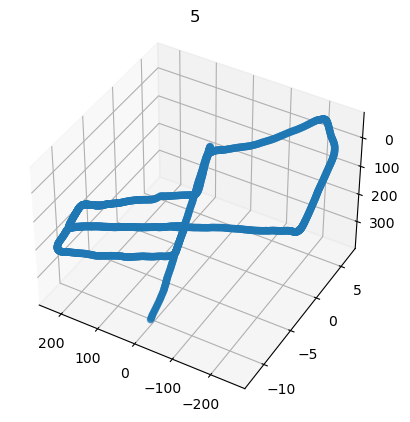

<Figure size 640x480 with 0 Axes>

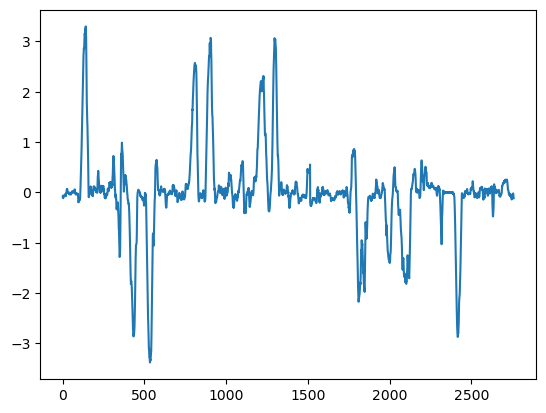

<Figure size 640x480 with 0 Axes>

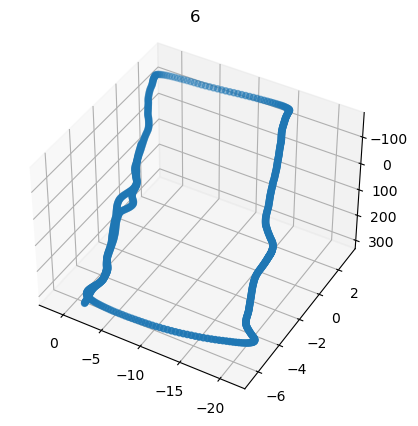

<Figure size 640x480 with 0 Axes>

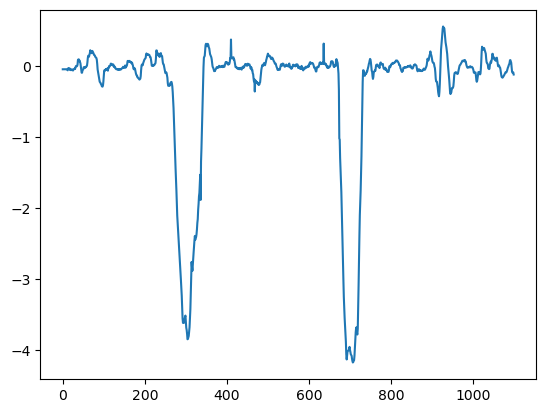

<Figure size 640x480 with 0 Axes>

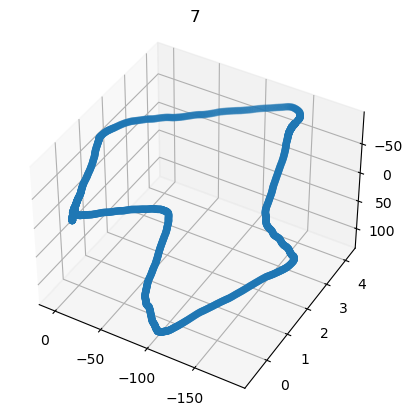

<Figure size 640x480 with 0 Axes>

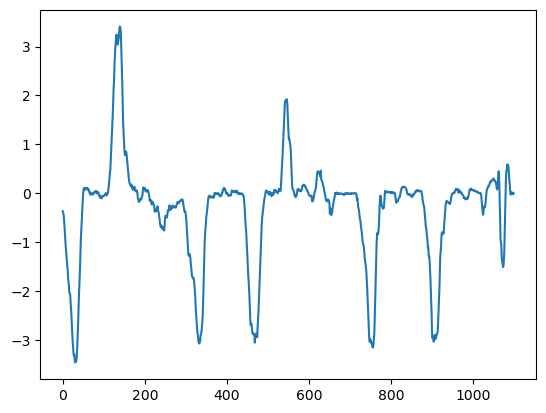

<Figure size 640x480 with 0 Axes>

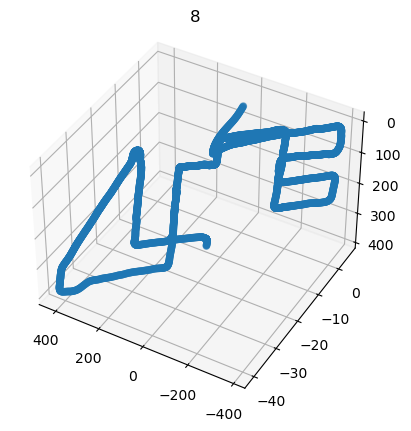

<Figure size 640x480 with 0 Axes>

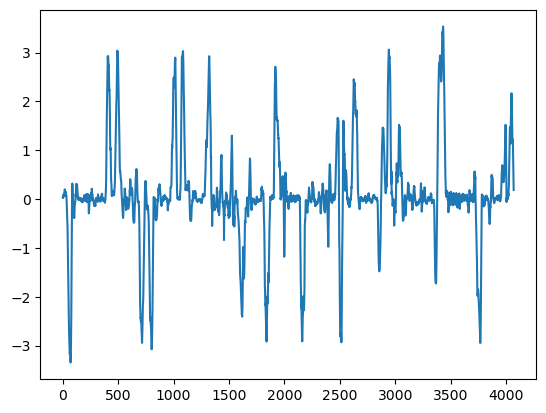

<Figure size 640x480 with 0 Axes>

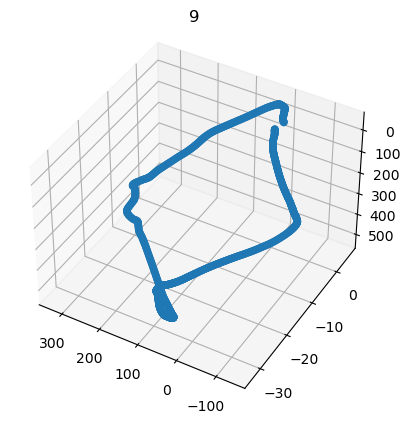

<Figure size 640x480 with 0 Axes>

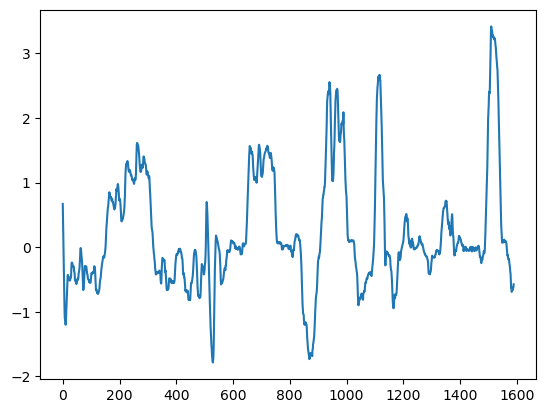

<Figure size 640x480 with 0 Axes>

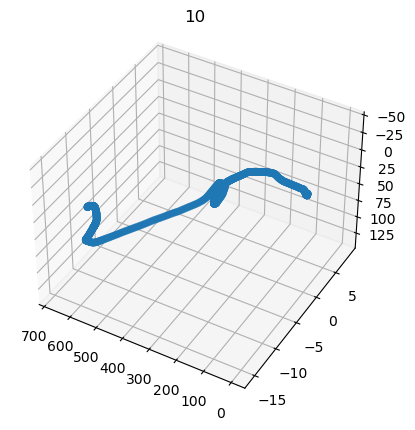

<Figure size 640x480 with 0 Axes>

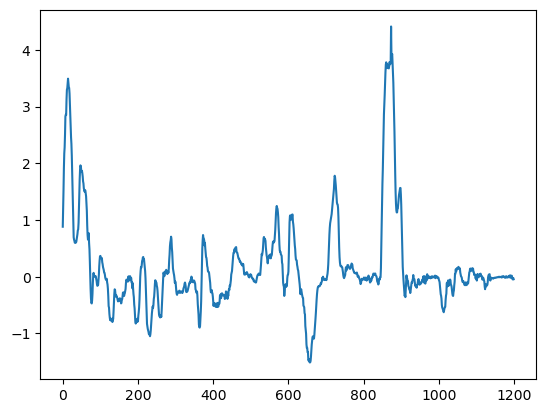

<Figure size 640x480 with 0 Axes>

In [132]:
from IPython.display import clear_output
import pykitti
from scipy.spatial.transform import Rotation as R

%matplotlib inline
label_ = []
for sequence in range(total_dataset_sz):
    
    basedir = 'D:\\dataset\\'
    sequence_ = '%02d' % sequence
    dataset = pykitti.odometry(basedir, sequence_)
    
   
    x=np.array([])
    y=np.array([])
    z=np.array([])
    yaw=np.array([])

    fig = plt.figure(sequence)
    ax = fig.add_subplot(projection='3d' )
    ax.set_title(str(sequence))
    for i in range(len(dataset.poses)):
        x=np.append(x, [dataset.poses[i][0][3]])
        y=np.append(y, [dataset.poses[i][1][3]])
        z=np.append(z, [dataset.poses[i][2][3]])

    ax.scatter(x, y, z, marker='o')
    
    ax.view_init(-140, 60)
    plt.pause(0.1)
    plt.clf()

    t_xyz = np.c_[x, y, z]
    dt_xyz = t_xyz[1:] - t_xyz[0:-1]
    dt_xz = dt_xyz[:,[0,2]]
    translation_ = np.sqrt( dt_xz[:,0]** 2 +  dt_xz[:,1]**2)

    translation_ += 0.28 
    
    
    fig1 = plt.figure()
    yaw_=np.zeros(len(dataset.poses))
    for i in range(len(dataset.poses)):
        r= R.from_matrix([[dataset.poses[i][0][0], dataset.poses[i][0][1], dataset.poses[i][0][2]], [dataset.poses[i][1][0], dataset.poses[i][1][1], dataset.poses[i][1][2]], [dataset.poses[i][2][0], dataset.poses[i][2][1], dataset.poses[i][2][2]]])
        yaw=-r.as_rotvec()[1]
        yaw_[i]=yaw
    # plt.plot(np.rad2deg(yaw_))

    diff_pitch_ = -(yaw_[1::]-yaw_[:-1:])

    # outlier detection
    idxs = np.where((diff_pitch_>np.deg2rad(300)) | (diff_pitch_<np.deg2rad(-300)))

    diff_pitch_[idxs] =  diff_pitch_[idxs] - np.deg2rad(360)  * np.sign(diff_pitch_[idxs])

    label_.append(np.transpose(np.array((translation_,diff_pitch_))))
    
    plt.plot((np.rad2deg(diff_pitch_)))
    plt.pause(0.001)
    plt.clf()
#     plt.ylim([-4, 4])
#     plt.show()

#clear_output(wait=True)

In [133]:
((len(label_)), binDataset_[0].shape, label_[0].shape)

(11, (4540, 2, 3601, 1), (4540, 2))

In [134]:
binDataset_ = np.array(binDataset_)
label_ = np.array(label_)

C:\Users\filiz\AppData\Local\Temp\ipykernel_12144\4136154583.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binDataset_ = np.array(binDataset_)
C:\Users\filiz\AppData\Local\Temp\ipykernel_12144\4136154583.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  label_ = np.array(label_)


In [135]:
binDataset_.shape, label_.shape

((11,), (11,))

In [136]:
binDataset_[0].shape, label_[0].shape

((4540, 2, 3601, 1), (4540, 2))

In [137]:
for i in range(len(binDataset_)) :
    binDataset_[i] = binDataset_[i][:binDataset_[i].shape[0]-binDataset_[i].shape[0]%distributed_time]
    label_[i] = label_[i][:label_[i].shape[0]-label_[i].shape[0]%distributed_time]

In [138]:
binDataset_[1].shape, label_[1].shape

((1100, 2, 3601, 1), (1100, 2))

In [139]:
binDataset = np.concatenate(binDataset_)
label = np.concatenate(label_)

In [140]:
binDataset.shape, label.shape

((23190, 2, 3601, 1), (23190, 2))

# Output Çıktısının(translation, rotation) Kutulanması(Örneklenmesi) İşlemi  

In [141]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(label)

label = scaler.transform(label)
scaler.data_max_, scaler.data_min_

(array([3.01743329, 0.07704157]), array([ 0.28007151, -0.08327863]))

In [142]:
def binOutput(label, sample_sz):
    t_bin = np.zeros(sample_sz)
    r_bin = np.zeros(sample_sz)

    interval = sample_sz-1

    t_bin = np.zeros(sample_sz)
    r_bin = np.zeros(sample_sz)
    labelBinned = np.array([[t_bin,r_bin]])
    for data in label:
        t_bin = np.zeros(sample_sz)
        r_bin = np.zeros(sample_sz)
        t_bin[int(((data[0]*interval)))] = 1
        r_bin[int(((data[1]*interval)))] = 1
        
        labelBinned = np.concatenate([labelBinned, np.array([np.array([t_bin, r_bin])])], axis=0)
    return labelBinned[1:]

In [143]:
labelBinned = binOutput(label, 21)

In [144]:
labelBinned.shape, label.shape

((23190, 2, 21), (23190, 2))

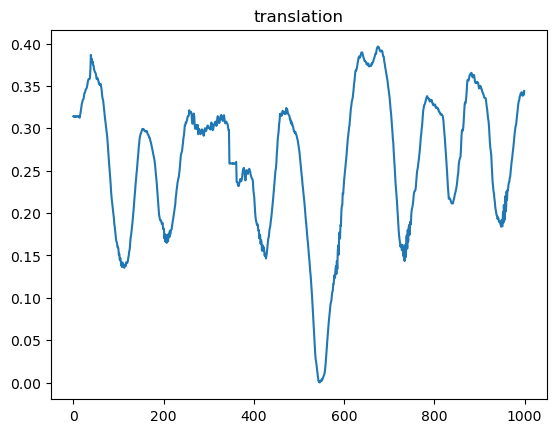

In [145]:
%matplotlib inline
plt.title('translation')
plt.plot(label[:,0][:1000])

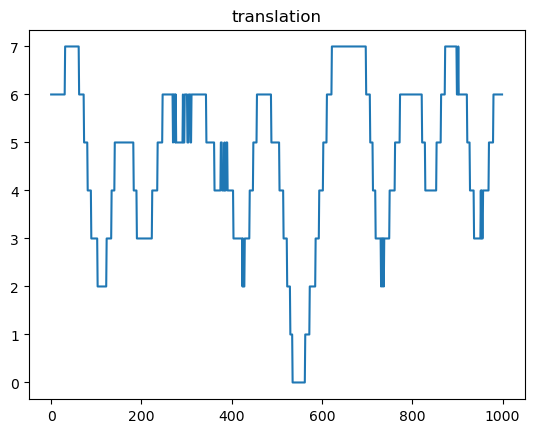

In [146]:
%matplotlib inline
np.where(labelBinned[:,0] > 0)[1]
plt.title('translation')
plt.plot(np.where(labelBinned[:,0] > 0)[1][:1000])

Burada outlier veriler bulunmakta bunlar histogram olarak incelenir.

(array([ 872., 2497., 4903., 7689., 5161., 1214.,   80.,   73.,  117.,
         584.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

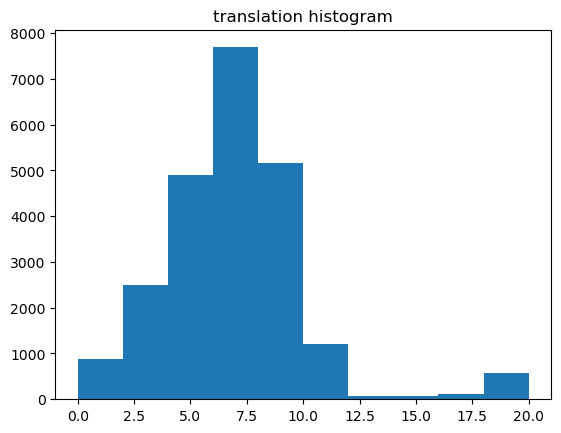

In [147]:
plt.title("translation histogram")
plt.hist(np.where(labelBinned[:,0] > 0)[1])

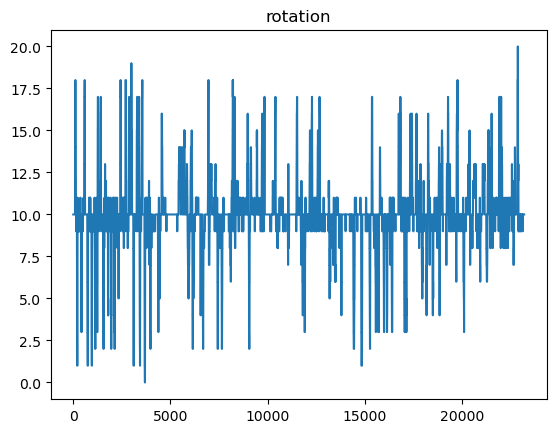

In [148]:
np.where(labelBinned[:,1] > 0)[1].shape
plt.title('rotation')
plt.plot(np.where(labelBinned[:,1] > 0)[1])

(array([   63.,   349.,   553.,   811.,  3400., 15197.,  1483.,   758.,
          484.,    92.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

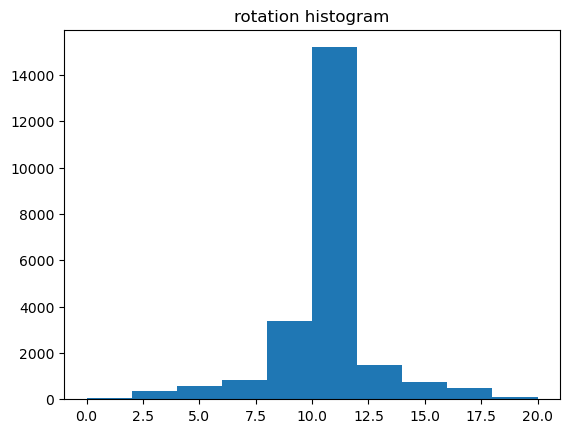

In [149]:
plt.title("rotation histogram")
plt.hist(np.where(labelBinned[:,1] > 0)[1])

## Translation dan gelen outlier ların silinmesi

In [150]:
outliers = np.where(np.where(labelBinned[:,0] > 0)[1]>11)
outliers = outliers[0]

In [151]:
(outliers[-1] - outliers[0]) == (max(outliers) - min(outliers))

True

In [152]:
min_truncate = outliers[0] - outliers[0] % distributed_time
max_truncate = outliers[-1] - outliers[-1] % distributed_time
min_truncate, max_truncate

(4605, 5635)

In [153]:
labelBinned=np.delete(labelBinned,np.s_[min_truncate:max_truncate],axis=0 )
binDataset=np.delete(binDataset,np.s_[min_truncate:max_truncate],axis=0 )

## After Translation Outlier Analysis

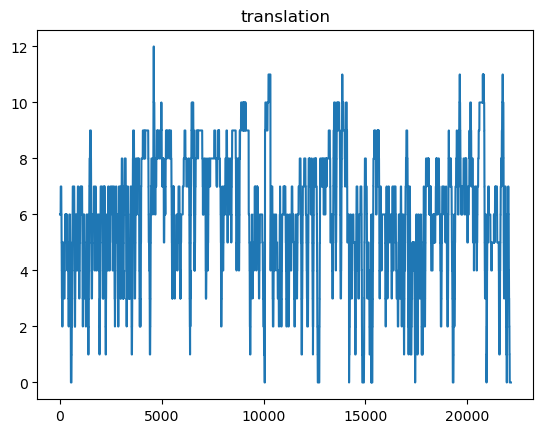

In [154]:
np.where(labelBinned[:,0] > 0)[1]
plt.title('translation')
plt.plot(np.where(labelBinned[:,0] > 0)[1])

(array([ 872.,  959., 1538., 2072., 2831., 7689., 2881., 2280.,  890.,
         148.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

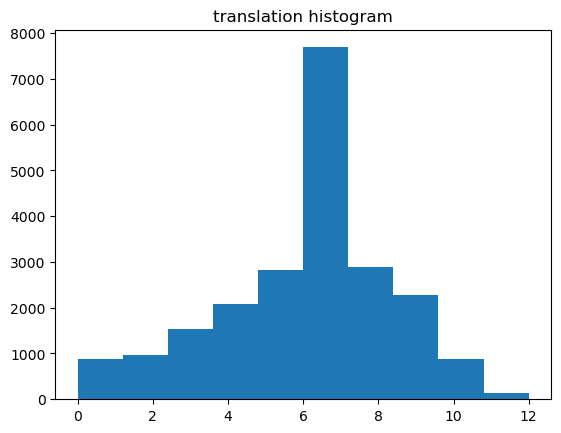

In [155]:
plt.title("translation histogram")
plt.hist(np.where(labelBinned[:,0] > 0)[1])

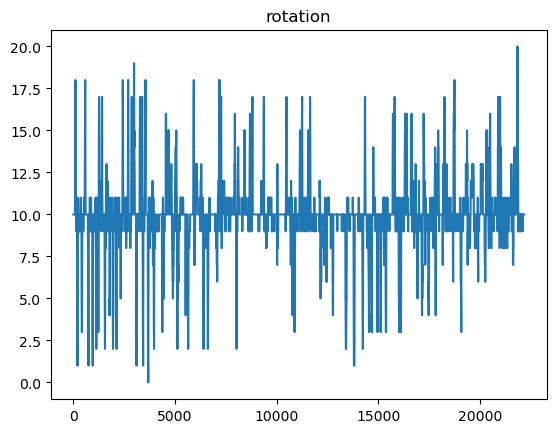

In [156]:
np.where(labelBinned[:,1] > 0)[1].shape
plt.title('rotation')
plt.plot(np.where(labelBinned[:,1] > 0)[1])

(array([   63.,   349.,   553.,   811.,  3395., 14339.,  1384.,   690.,
          484.,    92.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

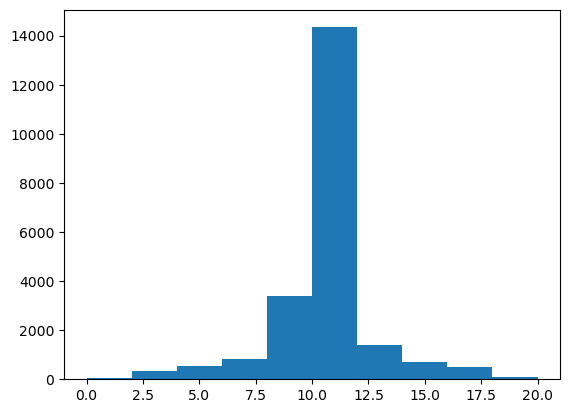

In [157]:
plt.hist(np.where(labelBinned[:,1] > 0)[1])

# Eğitim için gerekli kütüphanelerin getirilmesi ve verilerin tensor matrisi olarak oluşturulması

In [158]:
import tensorflow as tf

In [159]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU

In [160]:
np.random.seed(16)
tf.random.set_seed(16)

In [161]:
binDataset[:len(binDataset)].shape, label[:len(binDataset)].shape

((22160, 2, 3601, 1), (22160, 2))

In [162]:
binDataset = binDataset[:len(binDataset)]
label = label[:len(binDataset)]
labelBinned = labelBinned[:len(binDataset)]

In [163]:
binDataset=binDataset.reshape((int(len(binDataset)/distributed_time),distributed_time,2,3601,1))
labelBinned = labelBinned.reshape((int(len(labelBinned)/distributed_time),distributed_time,2,21))
# label = label.reshape((110,10,2))

In [164]:
int(len(binDataset))

4432

In [165]:
binDataset.shape, labelBinned.shape

((4432, 5, 2, 3601, 1), (4432, 5, 2, 21))

In [166]:
translation = labelBinned[:,:,0,:]
rotation = labelBinned[:,:,1,:]

In [167]:
translation.shape, rotation.shape

((4432, 5, 21), (4432, 5, 21))

In [168]:
binDataset, translation, rotation

(array([[[[[ 0.        ],
           [ 0.        ],
           [ 0.        ],
           ...,
           [ 0.        ],
           [ 0.        ],
           [ 0.        ]],
 
          [[ 0.        ],
           [ 0.        ],
           [73.48016344],
           ...,
           [ 0.        ],
           [ 0.        ],
           [ 0.        ]]],
 
 
         [[[ 0.        ],
           [ 0.        ],
           [73.48016344],
           ...,
           [ 0.        ],
           [ 0.        ],
           [ 0.        ]],
 
          [[72.76693954],
           [ 0.        ],
           [72.6450026 ],
           ...,
           [ 0.        ],
           [ 0.        ],
           [ 0.        ]]],
 
 
         [[[72.76693954],
           [ 0.        ],
           [72.6450026 ],
           ...,
           [ 0.        ],
           [ 0.        ],
           [ 0.        ]],
 
          [[71.92894222],
           [71.98888199],
           [ 0.        ],
           ...,
           [ 0.        ],

In [169]:
# train_data, val_data, test_data
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

True

In [170]:
# with tf.device('/device:GPU:0'):
dataset = tf.data.Dataset.from_tensor_slices((binDataset, {"translation": translation, "rotation" : rotation} ))
# tf.compat.v1.disable_eager_execution()
# data = (binDataset,label)
# a = tf.compat.v1.placeholder(tf.float32,shape=binDataset.shape)
# dataset = tf.data.Dataset.from_tensor_slices(a)
# dataset = dataset.prefetch(buffer_size=1000)
# dataset = dataset.batch(128)
# iterator = tf.compat.v1.data.make_initializable_iterator(dataset)
# next_batch = iterator.get_next()
# with tf.compat.v1.Session() as sess:
#     sess.run(iterator.initializer, feed_dict={a: binDataset})

In [171]:
DATASET_SIZE = len(dataset)
DATASET_SIZE

4432

In [172]:
train_size = int(0.85 * DATASET_SIZE)
val_size = int(0.05 * DATASET_SIZE)
test_size = int(0.1 * DATASET_SIZE)
#.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
full_dataset = dataset.shuffle(buffer_size=100).prefetch(buffer_size=tf.data.AUTOTUNE)

train_data = full_dataset.take(train_size).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = full_dataset.skip(train_size).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = test_data.skip(test_size).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.take(test_size).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [173]:
# train_data, val_data, test_data

In [174]:
# train_one_sample=train_data.take(1)
# train_one_sample

In [175]:
# for datum, label in train_one_sample:
#   print(f"""
#   bin shape: {datum.shape}
#   bin dtype: {datum.dtype}
#   bin data : {datum}
#   translation : {np.where(label['translation'] > 0)[1]}
#   rotation : {np.where(label['rotation'] > 0)[1]}
#         """)

# Temel CNN Ağının Üretilmesi

Bu ağ üzerinde önceden eğitim yapılıp ağırlıklandırılmış olacak sonrasında zamana göre dağıtılmış veriler ile eğitilecek

In [176]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model = Sequential([
  Conv1D(filters=32, 
          kernel_size=3, # can also be (3, 3)
          strides=1,
          activation="relu",
          padding="same",
          input_shape=(2, 3601, 1), name="Conv1"), # first layer specifies input shape (height, width, colour channels)
  Conv1D(32, 3, 2,  padding="same",activation="relu", name="Conv2"),
    
  AveragePooling2D(pool_size=(1,3),
                                     strides=(1,3),data_format='channels_last', padding='valid', name="AvgPool"),
  Conv1D(64, 3, 1,  padding="same",activation="relu", name="Conv3"),
  Conv1D(64, 3, 2,  padding="same",activation="relu", name="Conv4"),
  
  AveragePooling2D(pool_size=(1,3),
                                     strides=(1,3),data_format='channels_last', padding='valid', name="AvgPool2"),
  
  Conv1D(128, 3, 1,  padding="same",activation="relu", name="Conv5"),
  Conv1D(128, 3, 2,  padding="same",activation="relu", name="Conv6"),

  AveragePooling2D(pool_size=(1,3),strides=(1,3),data_format='channels_last', padding='valid', name="AvgPool3"),
  
  Conv1D(256, 3, 1,  padding="same",activation="relu", name="Conv7"),
  Conv1D(256, 3, 2,  padding="same",activation="relu", name="Conv8"),

  AveragePooling2D(pool_size=(1,3),strides=(1,3),data_format='channels_last', padding='valid', name="AvgPool4"),
  
    Flatten(),
  ])

In [177]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv1D)              (None, 2, 3601, 32)       128       
                                                                 
 Conv2 (Conv1D)              (None, 2, 1801, 32)       3104      
                                                                 
 AvgPool (AveragePooling2D)  (None, 2, 600, 32)        0         
                                                                 
 Conv3 (Conv1D)              (None, 2, 600, 64)        6208      
                                                                 
 Conv4 (Conv1D)              (None, 2, 300, 64)        12352     
                                                                 
 AvgPool2 (AveragePooling2D)  (None, 2, 100, 64)       0         
                                                                 
 Conv5 (Conv1D)              (None, 2, 100, 128)       2

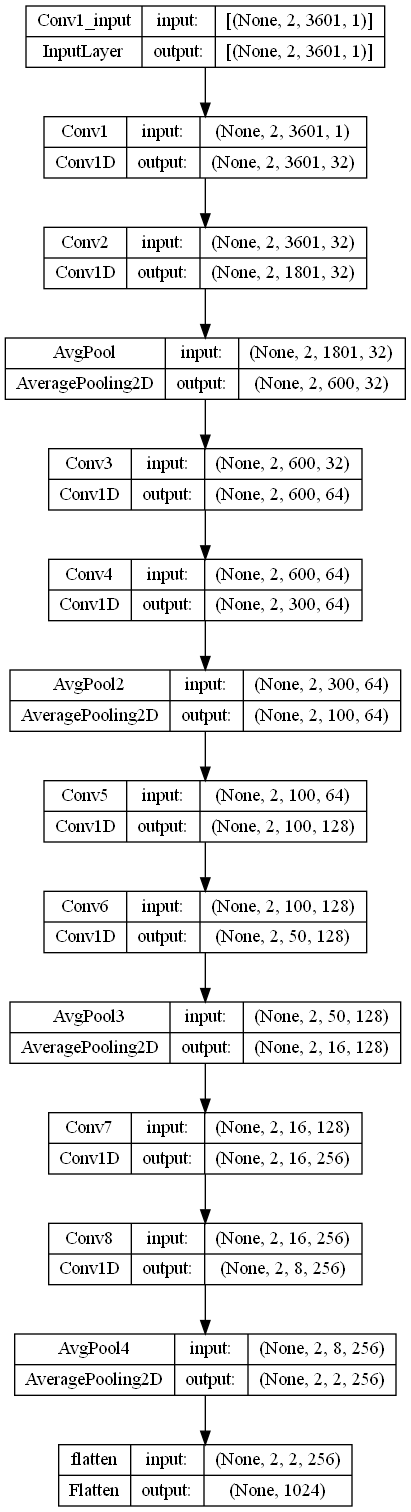

In [278]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Temel CNN modelinin yüklenmesi 

In [178]:
# load json and create model
json_file = open('kfold_cnn_model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("kfold_cnn_model2.h5")
print("Loaded model from disk")

Loaded model from disk


In [179]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 3601, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 sequential (Sequential)        (None, 1024)         391200      ['input_1[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 512)          524800      ['sequential[0][0]']             
                                                                                              

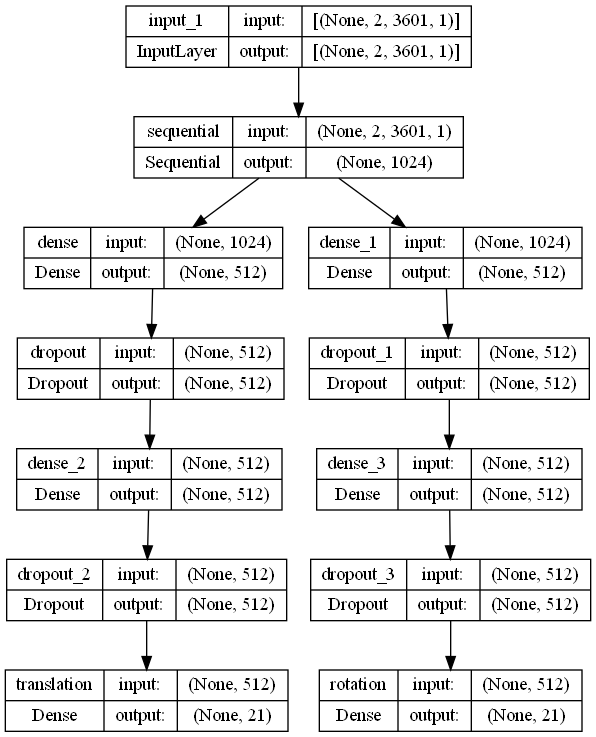

In [180]:
tf.keras.utils.plot_model(loaded_model, show_shapes=True)

# Ana CNN Ağının Zamana Göre Arıtılmış Üretilmesi

In [181]:
input_layer = tf.keras.layers.Input(shape=(None,2,3601,1), ragged=True)
cnn_model = model
# for layer in model.layers:
#     layer._inbound_nodes = []
#     cnn_model = layer(cnn_model)

In [182]:
cnn_model = TimeDistributed(cnn_model)(input_layer)

In [183]:
cnn_model = LSTM(1024,return_sequences=True)(cnn_model)

In [184]:
cnn_model = LSTM(1024,return_sequences=True)(cnn_model)

In [185]:
model1 = TimeDistributed(Dense(512, activation='relu'))(cnn_model)
model2 = TimeDistributed(Dense(512, activation='relu'))(cnn_model)

model1 = TimeDistributed(Dropout(0.2) )(model1)
model2 = TimeDistributed(Dropout(0.2) )(model2)


model1 = TimeDistributed(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3)))(model1)
model2 = TimeDistributed(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3)))(model2)

model1 = TimeDistributed(Dropout(0.2)) (model1)
model2 = TimeDistributed(Dropout(0.2)) (model2)

# model1 = TimeDistributed(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3)))(model1)
# model2 = TimeDistributed(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3)))(model2)

# model1 = TimeDistributed(Dropout(0.2)) (model1)
# model2 = TimeDistributed(Dropout(0.2)) (model2)

model1 = TimeDistributed(Dense(21,activation='softmax'), name="translation")(model1) # translate
model2 = TimeDistributed(Dense(21,activation='softmax'), name="rotation")(model2) # yaw

# model1 = tf.keras.layers.Activation('softmax', name="translation")(model1)
# model2 = tf.keras.layers.Activation('softmax', name="rotation")(model2)

pre_model = tf.keras.Model(inputs=[input_layer], outputs=[model1, model2])
# losses = {
# 	"translation": CustomAccuracyTranslation(),
# 	"rotation": CustomAccuracyRotation(),
# }
# # losses = {"translation" : "mse", "rotation" : "mse"}
# loss_weights = {'translation' : 1, 'rotation' : 150}
# pre_model.compile(optimizer='adam',  loss=losses,loss_weights=loss_weights, metrics={"translation": ["mse"], "rotation": ["mse"]})
# pre_model.compile(loss = 'binary_crossentropy',
#               optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9),
#               metrics = ['accuracy'])

In [186]:
pre_model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [187]:
pre_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 2, 36  0           []                               
                                01, 1)]                                                           
                                                                                                  
 time_distributed (TimeDistribu  (None, None, 1024)  391200      ['input_1[0][0]']                
 ted)                                                                                             
                                                                                                  
 lstm (LSTM)                    (None, None, 1024)   8392704     ['time_distributed[0][0]']       
                                                                                              

In [188]:
# !conda install graphviz -y
# !conda install pydot -y
# !conda install pydotplus -y

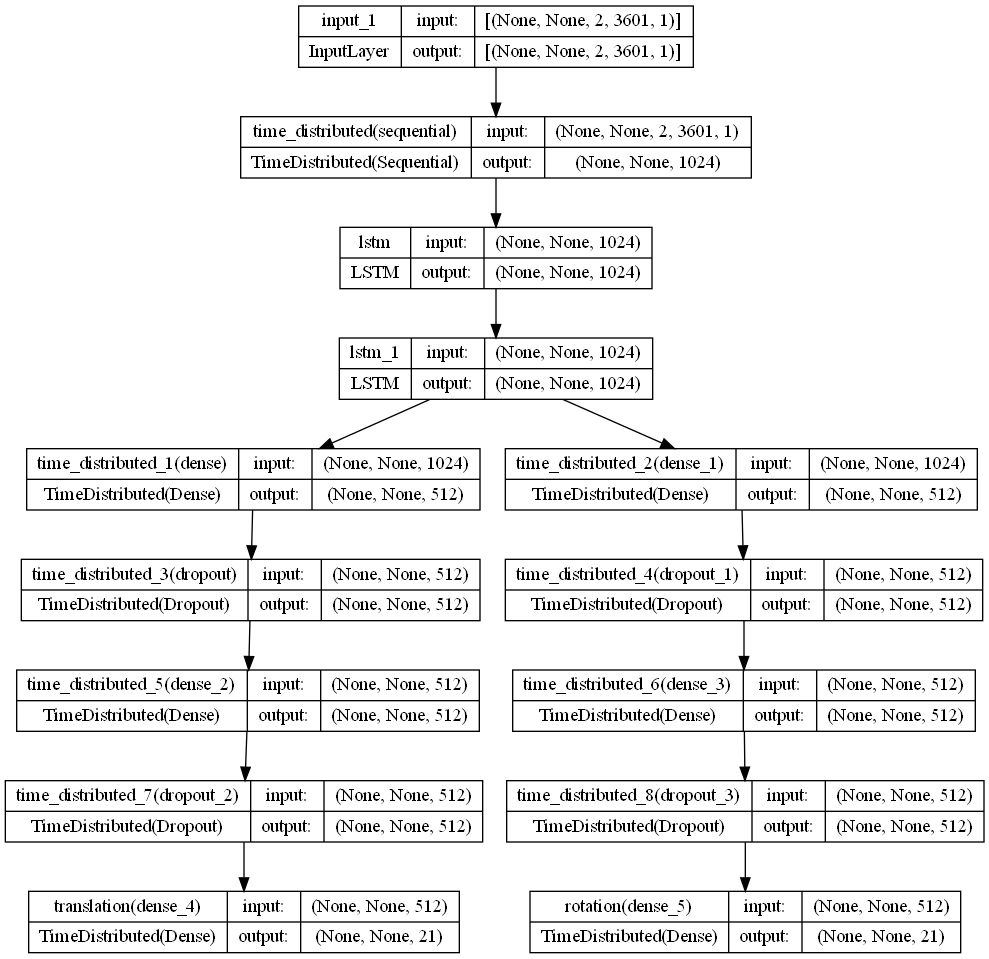

In [189]:
tf.keras.utils.plot_model(pre_model, show_shapes=True)

In [190]:
# train_data, val_data, test_data
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

True

In [191]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Önceden Eğitilmiş CNN ağının eklenmesi

In [192]:
seq = loaded_model.layers[1]
# model = seq
pre_model.layers[1].set_weights(loaded_model.layers[1].get_weights())

In [193]:
loaded_model.layers, pre_model.layers

([<keras.engine.input_layer.InputLayer at 0x1e8d05a5970>,
  <keras.layers.rnn.time_distributed.TimeDistributed at 0x1e94a8ea730>])

In [194]:
# pre_model.layers[-8].set_weights(loaded_model.layers[-8].get_weights())
[pre_model.layers[i].set_weights(loaded_model.layers[i].get_weights()) for i in list(map(lambda x : -x, list(range(1,11))))]

[None, None, None, None, None, None, None, None, None, None]

In [196]:
pre_model.fit(train_data, validation_data=val_data, verbose=1, epochs=10)

Epoch 1/10
118/118 [==============================] - 53s 302ms/step - loss: 1.8367 - translation_loss: 1.0141 - rotation_loss: 0.7960 - translation_accuracy: 0.6842 - rotation_accuracy: 0.7556 - val_loss: 1.2912 - val_translation_loss: 0.7765 - val_rotation_loss: 0.4889 - val_translation_accuracy: 0.7811 - val_rotation_accuracy: 0.8315
Epoch 2/10
118/118 [==============================] - 7s 57ms/step - loss: 0.6605 - translation_loss: 0.2949 - rotation_loss: 0.3392 - translation_accuracy: 0.9088 - rotation_accuracy: 0.8850 - val_loss: 0.8968 - val_translation_loss: 0.5565 - val_rotation_loss: 0.3133 - val_translation_accuracy: 0.8387 - val_rotation_accuracy: 0.8838
Epoch 3/10
118/118 [==============================] - 6s 55ms/step - loss: 0.3682 - translation_loss: 0.1522 - rotation_loss: 0.1889 - translation_accuracy: 0.9541 - rotation_accuracy: 0.9376 - val_loss: 0.8257 - val_translation_loss: 0.4681 - val_rotation_loss: 0.3307 - val_translation_accuracy: 0.8721 - val_rotation_accu

In [197]:
scores = pre_model.evaluate(test_data, verbose=0)
print(f'Score of no fold train of cnn integrated time distributed model: translation accuracy of {scores[-2]}; rotation accuracy of {scores[-1]}')

Score of no fold train of cnn integrated time distributed model: translation accuracy of 0.8952596187591553; rotation accuracy of 0.8902934789657593


In [198]:
scores

[1.089240312576294,
 0.5244799256324768,
 0.545354962348938,
 0.8952596187591553,
 0.8902934789657593]

## Save Time Distributed neural network

In [200]:
## serialize model to JSON
#pre_model_json = pre_model.to_json()
#with open("time_distributed.json", "w") as json_file:
#    json_file.write(pre_model_json)
# serialize weights to HDF5
#pre_model.save_weights("time_distributed.h5")
#print("Saved model to disk")

# Load Time Distributed neural network

In [211]:
# load json and create model
#json_file = open('time_distributed.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("time_distributed.h5")
#print("Loaded model from disk")

# Zamana bağlı modelin Test Verisinin tahmini

In [201]:
pre_model.output

[<KerasTensor: type_spec=RaggedTensorSpec(TensorShape([None, None, 21]), tf.float32, 1, tf.int64) (created by layer 'translation')>,
 <KerasTensor: type_spec=RaggedTensorSpec(TensorShape([None, None, 21]), tf.float32, 1, tf.int64) (created by layer 'rotation')>]

In [203]:
images, labels = tuple(zip(*test_data))

In [204]:
images = tf.convert_to_tensor(tf.concat(images, axis=0))

In [205]:
predictions = pre_model.predict(images)

14/14 [==============================] - 8s 20ms/step


# Modelden elde edilen çıktıların doğruluk kontrolü

In [206]:
predictions[0].shape, example_trained_data[1]['translation'].shape, example_trained_data[1]['rotation'].shape

((443, 5, 21), (32, 21), (32, 21))

In [207]:
labels[1]['translation'].shape

TensorShape([32, 5, 21])

In [209]:
y_test_r = tf.zeros([32,5, 21],dtype=tf.dtypes.float64)
y_test_t = tf.zeros([32,5, 21],dtype=tf.dtypes.float64)

for label in labels:
    y_test_t = tf.concat([y_test_t,label['translation']],axis=0)
    y_test_r = tf.concat([y_test_r,label['rotation']],axis=0)

In [210]:
y_test_t = y_test_t[32:]
y_test_r = y_test_r[32:]

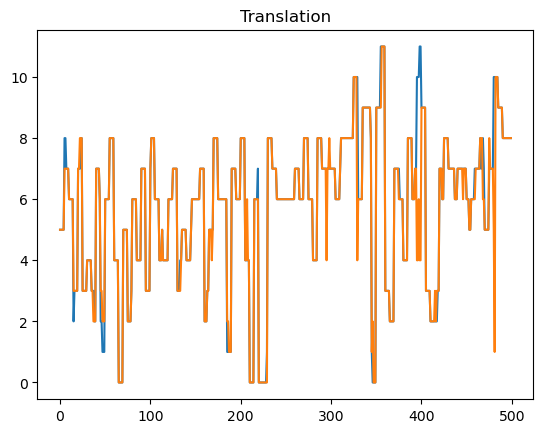

In [266]:
%matplotlib inline
plt.title("Translation")
plt.plot(np.argmax(np.einsum('ijk->ikj', y_test_t), axis=1).flatten()[:500])
plt.plot(np.argmax(np.einsum('ijk->ikj', predictions[0]), axis=1).flatten()[:500])
plt.show()

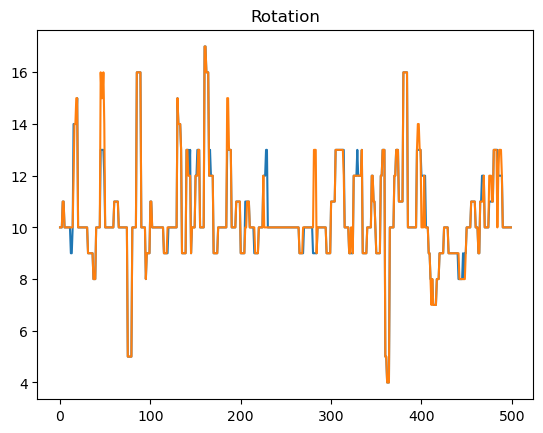

In [265]:
%matplotlib inline
plt.title("Rotation")
plt.plot(np.argmax(np.einsum('ijk->ikj', y_test_r), axis=1).flatten()[:500])
plt.plot(np.argmax(np.einsum('ijk->ikj', predictions[1]), axis=1).flatten()[:500])
plt.show()

In [273]:
%matplotlib qt
fig, axs = plt.subplots(distributed_time)
# axs[0].set_aspect('equal', adjustable='box')

start_idx = 0

for i in range(100, len(predictions[0]), 100):
    # axs = list(map(lambda x: x.cla(), axs))
    for j in range(distributed_time):
        axs[j].cla()
        axs[0].set_title("With Translation Prediction And GT")
        #axs[j].set_title("With Translation Prediction And GT")
        axs[j].plot(np.argmax(np.einsum('ijk->ikj', y_test_t[start_idx:i]), axis=1)[:,j], label="GT")
        axs[j].plot(np.argmax(np.einsum('ijk->ikj', predictions[0][start_idx:i]), axis=1)[:,j], label="Tahmin")

    start_idx = i
    plt.legend()
    plt.pause(0.0000000001)
    plt.show()

In [275]:
%matplotlib qt
fig, axs = plt.subplots(distributed_time)
# axs[0].set_aspect('equal', adjustable='box')

start_idx = 0
for i in range(100, len(predictions[1]), 100):
    # axs = list(map(lambda x: x.cla(), axs))

    for j in range(distributed_time):
        axs[j].cla()
        axs[0].set_title("With Rotation Prediction And GT")
        axs[j].plot(np.argmax(np.einsum('ijk->ikj', y_test_r[start_idx:i]), axis=1)[:,j], label="GT")
        axs[j].plot(np.argmax(np.einsum('ijk->ikj', predictions[1][start_idx:i]), axis=1)[:,j], label="Tahmin")

    start_idx = i
    plt.legend()
    plt.pause(0.0000000001)
    plt.show()

## CNN-LSTM Odometri Artımlı Çizim

In [260]:
predictions[0].shape

(443, 5, 21)

In [248]:
prediction_seq_t = predictions[0].reshape((predictions[0].shape[0]*predictions[0].shape[1], predictions[0].shape[2]))

In [249]:
prediction_seq_r = predictions[1].reshape((predictions[1].shape[0]*predictions[1].shape[1], predictions[1].shape[2]))

In [251]:
gt_odometry_seq_t = tf.reshape(y_test_t,(y_test_t.shape[0]*y_test_t.shape[1], y_test_t.shape[2]))

In [252]:
gt_odometry_seq_r = tf.reshape(y_test_r,(y_test_r.shape[0]*y_test_r.shape[1], y_test_r.shape[2]))

In [253]:
scaler.data_max_, scaler.data_min_

(array([3.01743329, 0.07704157]), array([ 0.28007151, -0.08327863]))

In [254]:
scaleFactor =(scaler.data_max_ - scaler.data_min_) / 21
scaleFactor

array([0.13035056, 0.0076343 ])

In [255]:
minim=scaler.data_min_[0]
binRealValuesMap_T = np.array([0])
for i in range(21):
    binRealValuesMap_T = np.append(binRealValuesMap_T, [minim])
    minim += scaleFactor[0]
binRealValuesMap_T = binRealValuesMap_T[1:]

In [256]:
minim=scaler.data_min_[1]
binRealValuesMap_R = np.array([0])
for i in range(21):
    binRealValuesMap_R = np.append(binRealValuesMap_R, [minim])
    minim += scaleFactor[1]
binRealValuesMap_R = binRealValuesMap_R[1:]

In [257]:
binRealValuesMap_T.shape, binRealValuesMap_R.shape

((21,), (21,))

In [258]:
prediction_odometry = np.array([binRealValuesMap_T[np.argmax(prediction_seq_t, axis=1)], binRealValuesMap_R[np.argmax(prediction_seq_r, axis=1)] ]).transpose()

In [259]:
gt_odometry = np.array([binRealValuesMap_T[np.argmax(gt_odometry_seq_t, axis=1)], binRealValuesMap_R[np.argmax(gt_odometry_seq_r, axis=1)] ]).transpose()

In [262]:
prediction_odometry.shape, gt_odometry.shape

((2215, 2), (2215, 2))

In [263]:
%matplotlib qt
x=np.array([0])
y=np.array([0])
z=np.array([0])
yaw=0
fig = plt.figure("test")
ax = fig.add_subplot(projection='3d')
ax.set_title("test")
for i in range(len(prediction_odometry)):
    trans_diff=prediction_odometry[i][0]
    yaw += prediction_odometry[i][1]
    x=np.append(x, [x[-1] + trans_diff*np.cos(yaw)])
    y=np.append(y, [y[-1] + trans_diff*np.sin(yaw)])
    z=np.append(z, [0])

gt_x=np.array([0])
gt_y=np.array([0])
gt_z=np.array([0])
gt_yaw=0
# fig = plt.figure("deneme")
# ax = fig.add_subplot(projection='3d')
# ax.set_title("test")
for i in range(len(gt_odometry)):
    trans_diff=gt_odometry[i][0]
    gt_yaw += gt_odometry[i][1]
    # print(gt_x[-1] , trans_diff, gt_yaw)
    gt_x=np.append(gt_x, [gt_x[-1] + trans_diff*np.cos(gt_yaw)])
    gt_y=np.append(gt_y, [gt_y[-1] + trans_diff*np.sin(gt_yaw)])
    gt_z=np.append(gt_z, [0])
    #gt_yaw += yaw_diff


ax.scatter(gt_x, gt_y, gt_z, marker='o')
ax.scatter(x, y, z, marker='o')

# Örnek Batch verisi kontrolü

In [215]:
train_batch = train_data.as_numpy_iterator()

In [216]:
example_trained_data = train_batch.next()

In [217]:
example_trained_data[0].shape # input

(32, 5, 2, 3601, 1)

In [218]:
example_trained_data[1]['translation'].shape, example_trained_data[1]['rotation'].shape

((32, 5, 21), (32, 5, 21))

In [219]:
example_bin_input_time_distributed = example_trained_data[0][0]
example_bin_input_time_distributed.shape
example_bin_output_time_distributed_translation = example_trained_data[1]['translation'][0]
example_bin_output_time_distributed_rotation = example_trained_data[1]['rotation'][0]

In [220]:
def plotAngleBin(ax,angleBin):
    ax.cla()
    ax.scatter(0,0)
    xList = []
    yList = []
    for angle, bin in enumerate(angleBin):
        if bin > 0:
            y=bin*np.sin(np.deg2rad(angle*0.1))
            x=bin*np.cos(np.deg2rad(angle*0.1))
            xList.append(x)
            yList.append(y)
            # ax.scatter(x,y)
    ax.scatter(xList,yList)
    plt.pause(1)
    plt.show()

In [221]:
%matplotlib qt
# %matplotlib inline
fig, axs = plt.subplots(2)
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

for i in range(len(example_bin_input_time_distributed)):
    fig.suptitle("Zaman Serisinde Verilen iki resim")
    text = fig.text(0.1, 0.1,"translation:{translation} rotation:{rotation} ".format(translation=np.argmax(example_bin_output_time_distributed_translation[i]), rotation=np.argmax(example_bin_output_time_distributed_rotation[i])))
    plotAngleBin(axs[0], example_bin_input_time_distributed[i][0])
    
    plotAngleBin(axs[1], example_bin_input_time_distributed[i][1])
    text.remove()
    # print(example_bin_input_time_distributed[i][0] == example_bin_input_time_distributed[i][1])


KeyboardInterrupt: 

#  K-Fold CNN training

Bu kısım eğitildikten sonra Ana CNN Ağının Zamana Göre Arıtılmış Üretilmesi kısmından devam edilir

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pykitti
import math 
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import tensorflow as tf
def readBinDataset(filename):
    binDataset = np.load(filename, allow_pickle=True)
    #print(bin)

    return binDataset

In [56]:
total_dataset_sz = 11
binDataset_ = []

In [57]:
#windows
for sequence in range(total_dataset_sz):
    binDataset_.append(readBinDataset(r"D:\Ara\numpy_dataset_sequences\%02d_angleBin.npy" % sequence))
    binDataset_[sequence]=binDataset_[sequence].reshape((len(binDataset_[sequence]), 3601,1 ))
    binDataset_[sequence] = np.array([ consec_frames for consec_frames in zip(binDataset_[sequence][0::], binDataset_[sequence][1::])])

# linux
#binDataset=readBinDataset("/mnt/d/Ara/numpy_dataset_sequences/%02d_angleBin.npy" % sequence)

In [58]:
len(binDataset_),  binDataset_[0].shape

(11, (4540, 2, 3601, 1))

In [59]:
from IPython.display import clear_output

%matplotlib inline
label_ = []
for sequence in range(total_dataset_sz):
    
    basedir = 'D:\\dataset\\'
    sequence_ = '%02d' % sequence
    dataset = pykitti.odometry(basedir, sequence_)
    
   
    x=np.array([])
    y=np.array([])
    z=np.array([])
    yaw=np.array([])

    fig = plt.figure(sequence)
    ax = fig.add_subplot(projection='3d' )
    ax.set_title(str(sequence))
    for i in range(len(dataset.poses)):
        x=np.append(x, [dataset.poses[i][0][3]])
        y=np.append(y, [dataset.poses[i][1][3]])
        z=np.append(z, [dataset.poses[i][2][3]])

    ax.scatter(x, y, z, marker='o')
    
    ax.view_init(-140, 60)
    plt.pause(0.1)
    plt.clf()

    t_xyz = np.c_[x, y, z]
    dt_xyz = t_xyz[1:] - t_xyz[0:-1]
    dt_xz = dt_xyz[:,[0,2]]
    translation_ = np.sqrt( dt_xz[:,0]** 2 +  dt_xz[:,1]**2)

    translation_ += 0.28 
    
    
    fig1 = plt.figure()
    yaw_=np.zeros(len(dataset.poses))
    for i in range(len(dataset.poses)):
        r= R.from_matrix([[dataset.poses[i][0][0], dataset.poses[i][0][1], dataset.poses[i][0][2]], [dataset.poses[i][1][0], dataset.poses[i][1][1], dataset.poses[i][1][2]], [dataset.poses[i][2][0], dataset.poses[i][2][1], dataset.poses[i][2][2]]])
        yaw=-r.as_rotvec()[1]
        yaw_[i]=yaw
    # plt.plot(np.rad2deg(yaw_))

    diff_pitch_ = -(yaw_[1::]-yaw_[:-1:])

    # outlier detection
    idxs = np.where((diff_pitch_>np.deg2rad(300)) | (diff_pitch_<np.deg2rad(-300)))

    diff_pitch_[idxs] =  diff_pitch_[idxs] - np.deg2rad(360)  * np.sign(diff_pitch_[idxs])

    label_.append(np.transpose(np.array((translation_,diff_pitch_))))
    
    plt.plot((np.rad2deg(diff_pitch_)))
    plt.pause(0.001)
    plt.clf()
#     plt.ylim([-4, 4])
#     plt.show()

clear_output(wait=True)

<Figure size 640x480 with 0 Axes>

In [60]:
((len(label_)),binDataset_[0].shape, label_[0].shape)

(11, (4540, 2, 3601, 1), (4540, 2))

In [61]:
binDataset_ = np.array(binDataset_)
label_ = np.array(label_)
binDataset_.shape, label_.shape

C:\Users\filiz\AppData\Local\Temp\ipykernel_12144\785166724.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binDataset_ = np.array(binDataset_)
C:\Users\filiz\AppData\Local\Temp\ipykernel_12144\785166724.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  label_ = np.array(label_)


((11,), (11,))

In [62]:
binDataset_ = np.concatenate(binDataset_)
label_ =  np.concatenate(label_)

In [63]:
binDataset_.shape, label_.shape

((23190, 2, 3601, 1), (23190, 2))

## Outlier analysis of CNN

In [64]:
def binOutput(label, sample_sz):
    t_bin = np.zeros(sample_sz)
    r_bin = np.zeros(sample_sz)

    interval = sample_sz-1

    t_bin = np.zeros(sample_sz)
    r_bin = np.zeros(sample_sz)
    labelBinned = np.array([[t_bin,r_bin]])
    for data in label:
        t_bin = np.zeros(sample_sz)
        r_bin = np.zeros(sample_sz)
        t_bin[int(((data[0]*interval)))] = 1
        r_bin[int(((data[1]*interval)))] = 1
        
        labelBinned = np.concatenate([labelBinned, np.array([np.array([t_bin, r_bin])])], axis=0)
    return labelBinned[1:]

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(label_)

label_ = scaler.transform(label_)
scaler.data_max_, scaler.data_min_

(array([3.01743329, 0.07704157]), array([ 0.28007151, -0.08327863]))

In [66]:
labelBinned = binOutput(label_, 21)

In [67]:
labelBinned.shape, label.shape

((23190, 2, 21), (22160, 2))

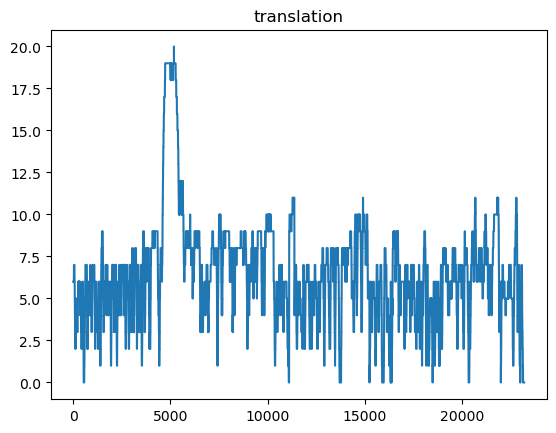

In [68]:
np.where(labelBinned[:,0] > 0)[1]
plt.title('translation')
plt.plot(np.where(labelBinned[:,0] > 0)[1])

(array([ 872., 2497., 4903., 7689., 5161., 1214.,   80.,   73.,  117.,
         584.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

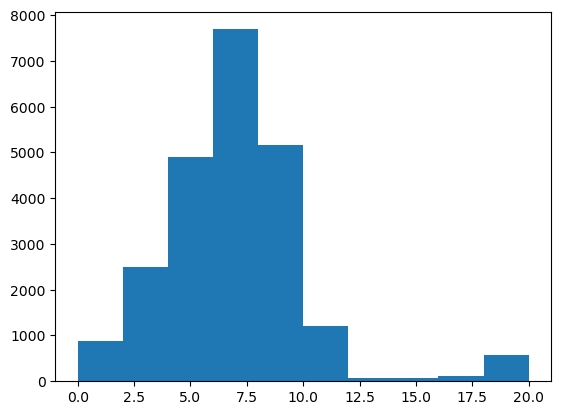

In [69]:
plt.hist(np.where(labelBinned[:,0] > 0)[1])

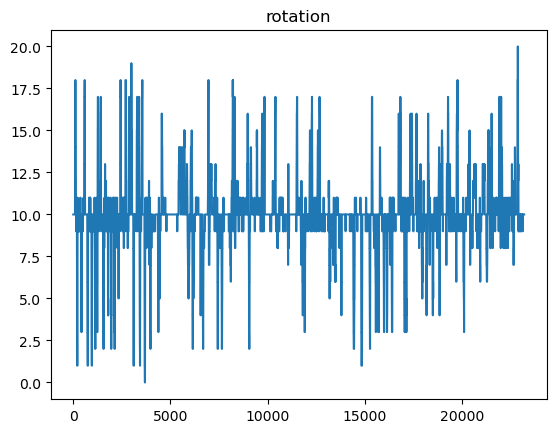

In [70]:
np.where(labelBinned[:,1] > 0)[1].shape
plt.title('rotation')
plt.plot(np.where(labelBinned[:,1] > 0)[1])

In [71]:
label_.shape, np.argmax(labelBinned)

((23190, 2), 6)

(array([   63.,   349.,   553.,   811.,  3400., 15197.,  1483.,   758.,
          484.,    92.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

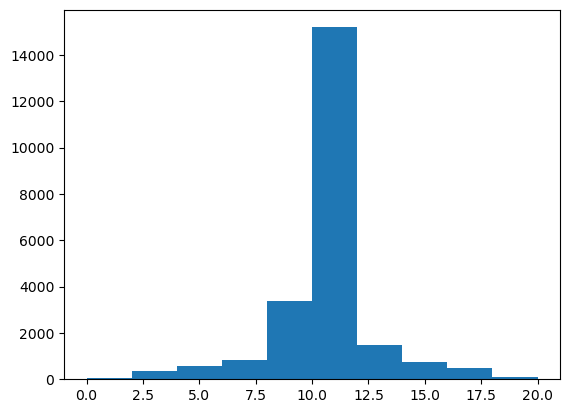

In [72]:
plt.hist(np.where(labelBinned[:,1] > 0)[1])

In [73]:
outliers = np.where(np.where(labelBinned[:,0] > 0)[1]>11)
outliers = outliers[0]

In [74]:
(outliers[-1] - outliers[0]) == (max(outliers) - min(outliers))

True

In [75]:
min_truncate = outliers[0]
max_truncate = outliers[-1]
min_truncate, max_truncate

(4607, 5639)

In [76]:
labelBinned=np.delete(labelBinned,np.s_[min_truncate:max_truncate],axis=0 )
binDataset=np.delete(binDataset_,np.s_[min_truncate:max_truncate],axis=0 )

## After Outlier Analysis

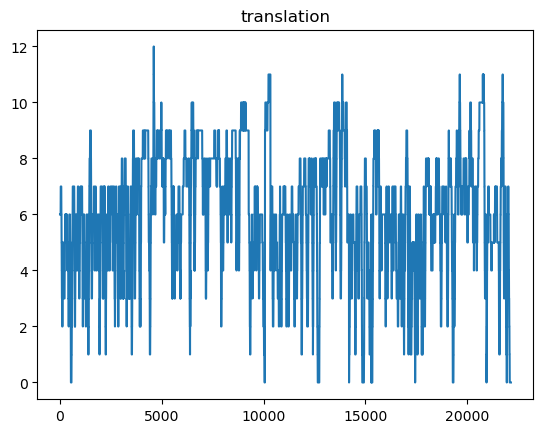

In [77]:
np.where(labelBinned[:,0] > 0)[1]
plt.title('translation')
plt.plot(np.where(labelBinned[:,0] > 0)[1])

(array([ 872.,  959., 1538., 2072., 2831., 7689., 2881., 2280.,  890.,
         146.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

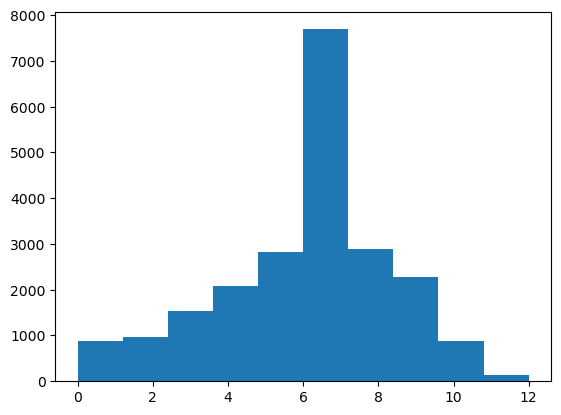

In [78]:
plt.hist(np.where(labelBinned[:,0] > 0)[1])

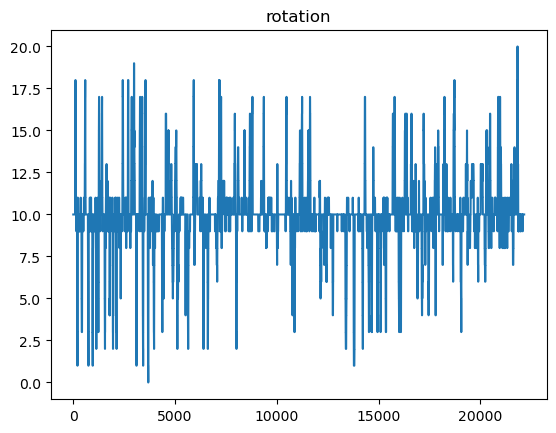

In [79]:
np.where(labelBinned[:,1] > 0)[1].shape
plt.title('rotation')
plt.plot(np.where(labelBinned[:,1] > 0)[1])

(array([   63.,   349.,   553.,   811.,  3395., 14337.,  1384.,   690.,
          484.,    92.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

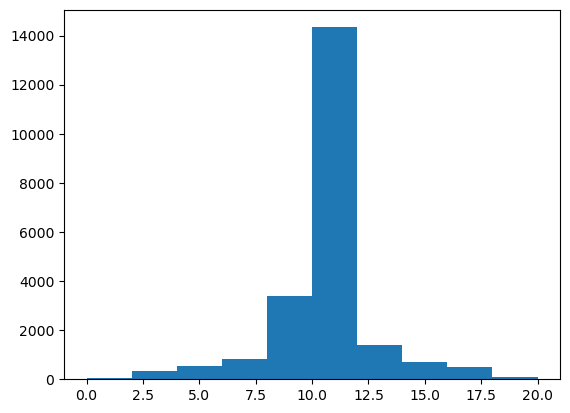

In [80]:
plt.hist(np.where(labelBinned[:,1] > 0)[1])

In [81]:
from sklearn.model_selection import KFold
num_folds = 5

In [82]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

verbosity = 1
no_epochs = 30
batch_size = 32

In [83]:
from keras import backend as K
import keras

def reset_weights(model):
    for layer in model.layers: 
        if isinstance(layer, tf.keras.Model):
            reset_weights(layer)
            continue
        for k, initializer in layer.__dict__.items():
            if "initializer" not in k:
                continue
            # find the corresponding variable
            var = getattr(layer, k.replace("_initializer", ""))
            var.assign(initializer(var.shape, var.dtype))

In [84]:
reset_weights(model)
keras.backend.clear_session()

C:\Users\filiz\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [85]:
fold_no = 1

In [86]:
acc_per_fold = []

In [87]:
loss_per_fold = []

In [88]:
def plotAngleBin(ax,angleBin):
    
    ax.scatter(0,0)
    xList = []
    yList = []
    for angle, bin in enumerate(angleBin):
        if bin > 0:
            y=bin*np.sin(np.deg2rad(angle*0.1))
            x=bin*np.cos(np.deg2rad(angle*0.1))
            xList.append(x)
            yList.append(y)
            # ax.scatter(x,y)
    ax.scatter(xList,yList)
    plt.pause(0.00000000000001)
    plt.show()

# K-Fold Eğitim için gerekli kütüphanelerin getirilmesi

In [89]:
import tensorflow as tf

In [90]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from keras.layers import TimeDistributed
from keras.layers import LSTM
np.random.seed(16)
tf.random.set_seed(16)

In [91]:
input_layer = tf.keras.layers.Input(shape=(2,3601,1))

In [92]:
# model_ = Dense(1024, activation='relu')(model(input_layer))
# model2 = Dense(1024, activation='relu')(model(input_layer))



model1 = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model(input_layer))
model2 = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model(input_layer))

model1 = Dropout(0.2) (model1)
model2 = Dropout(0.2) (model2)

model1 = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model1)
model2 = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(1e-3))(model2)

model1 = tf.keras.layers.Dropout(0.2) (model1)
model2 = tf.keras.layers.Dropout(0.2) (model2)

model1 = Dense(21, name="translation",activation='softmax')(model1) # translate
model2 = Dense(21, name="rotation",activation='softmax')(model2) # yaw

# model1 = tf.keras.layers.Activation('softmax', name="translation")(model1)
# model2 = tf.keras.layers.Activation('softmax', name="rotation")(model2)

kfold_cnn_model = tf.keras.Model(inputs=[input_layer], outputs=[model1, model2])

kfold_cnn_model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

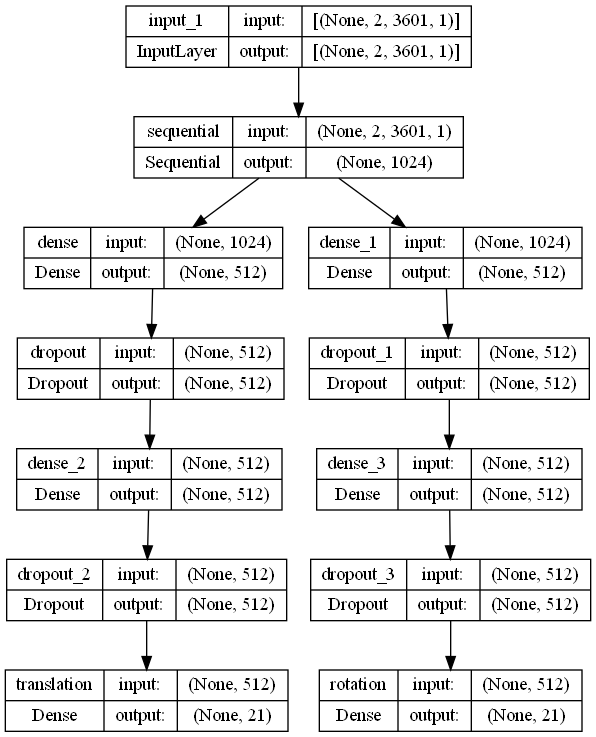

In [93]:
tf.keras.utils.plot_model(kfold_cnn_model, show_shapes=True)

In [94]:
def binOutput(label, sample_sz):
    t_bin = np.zeros(sample_sz)
    r_bin = np.zeros(sample_sz)

    interval = sample_sz-1

    t_bin = np.zeros(sample_sz)
    r_bin = np.zeros(sample_sz)
    labelBinned = np.array([[t_bin,r_bin]])
    for data in label:
        t_bin = np.zeros(sample_sz)
        r_bin = np.zeros(sample_sz)
        t_bin[int(((data[0]*interval)))] = 1
        r_bin[int(((data[1]*interval)))] = 1
        
        labelBinned = np.concatenate([labelBinned, np.array([np.array([t_bin, r_bin])])], axis=0)
    return labelBinned[1:]

In [95]:
binDataset.shape, labelBinned.shape

((22158, 2, 3601, 1), (22158, 2, 21))

In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


binDataset_train, binDataset_test, label_train_t, label_test_t , label_train_r ,label_test_r = train_test_split(binDataset, labelBinned[:,0,:], labelBinned[:,1,:], test_size=0.33, shuffle=False)

In [97]:
reset_weights(kfold_cnn_model)
keras.backend.clear_session()
for train, test in kfold.split(binDataset_train, label_train_t):
    train_data_ = binDataset_train[train]
    train_label_t = label_train_t[train]
    train_label_r = label_train_r[train]
    


    dataset_ = tf.data.Dataset.from_tensor_slices((train_data_, {"translation": train_label_t, "rotation" : train_label_r}))
    full_dataset_ = dataset_.shuffle(buffer_size=100).batch(batch_size=batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    
    history=kfold_cnn_model.fit(full_dataset_,
              epochs=no_epochs,
              verbose=verbosity)
    

    test_data_ = binDataset_train[test]
    test_label_t = label_train_t[test]
    test_label_r = label_train_r[test]
    

    test_label_data = {"translation": test_label_t, "rotation" : test_label_r}

    # Generate generalization metrics
    scores = kfold_cnn_model.evaluate(test_data_, test_label_data, verbose=0)
    print(f'Score for fold {fold_no}: {kfold_cnn_model.metrics_names[-2]} of {scores[-2]}; {kfold_cnn_model.metrics_names[-1]} of {scores[-1]}')
   
    
    test_label_data = {"translation": label_test_t, "rotation" : label_test_r}

    # Generate generalization metrics
    scores = kfold_cnn_model.evaluate(binDataset_test, test_label_data, verbose=0)
    print(f'Score for fold {fold_no} Test data: translation acc of {scores[-2]}; rotation acc of {scores[-1]}')

    acc_per_fold.append(scores[-2])
    loss_per_fold.append(scores[-1])

    fold_no = fold_no + 1
    break
    

Epoch 1/30
372/372 [==============================] - 213s 37ms/step - loss: 4.3105 - translation_loss: 2.1001 - rotation_loss: 1.5881 - translation_accuracy: 0.2473 - rotation_accuracy: 0.5710
Epoch 2/30
372/372 [==============================] - 13s 34ms/step - loss: 3.6053 - translation_loss: 1.9287 - rotation_loss: 1.4576 - translation_accuracy: 0.2894 - rotation_accuracy: 0.5819
Epoch 3/30
372/372 [==============================] - 14s 37ms/step - loss: 3.4227 - translation_loss: 1.8832 - rotation_loss: 1.4000 - translation_accuracy: 0.2908 - rotation_accuracy: 0.5914
Epoch 4/30
372/372 [==============================] - 14s 37ms/step - loss: 3.3034 - translation_loss: 1.8324 - rotation_loss: 1.3594 - translation_accuracy: 0.3172 - rotation_accuracy: 0.5938
Epoch 5/30
372/372 [==============================] - 14s 37ms/step - loss: 3.2738 - translation_loss: 1.8474 - rotation_loss: 1.3257 - translation_accuracy: 0.2991 - rotation_accuracy: 0.5945
Epoch 6/30
372/372 [==============

# Save Pretrained CNN Model

In [121]:
# # serialize model to JSON
# model_json = kfold_cnn_model.to_json()
# with open("kfold_cnn_model3.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# kfold_cnn_model.save_weights("kfold_cnn_model3.h5")
# print("Saved model to disk")

# Load PreTrained CNN Model

In [98]:
# load json and create model
json_file = open('kfold_cnn_model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("kfold_cnn_model2.h5")
print("Loaded model from disk")

Loaded model from disk


In [99]:
loaded_model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [100]:
binDataset_test.shape ,label_test_t.shape , label_test_r.shape

((7313, 2, 3601, 1), (7313, 21), (7313, 21))

In [101]:
test_label_data = {"translation": label_test_t, "rotation" : label_test_r}

# Generate generalization metrics
scores = loaded_model.evaluate(binDataset_test, test_label_data, verbose=0)
scores

[1.0882625579833984,
 0.4521990716457367,
 0.4392118752002716,
 0.9146724939346313,
 0.9180910587310791]

In [102]:
kfold_cnn_model = loaded_model

In [103]:
def plotAngleBin(ax,angleBin):
    ax.cla()
    ax.scatter(0,0)
    xList = []
    yList = []
    for angle, bin in enumerate(angleBin):
        if bin > 0:
            y=bin*np.sin(np.deg2rad(angle*0.1))
            x=bin*np.cos(np.deg2rad(angle*0.1))
            xList.append(x)
            yList.append(y)
            # ax.scatter(x,y)
    ax.scatter(xList,yList)
    plt.pause(1)
    plt.show()

In [104]:
train_batch = full_dataset_.as_numpy_iterator()
example_trained_data = train_batch.next()
example_trained_data[0].shape # input
print(example_trained_data[1]['translation'].shape, example_trained_data[1]['rotation'].shape)
example_bin_input = example_trained_data[0]
example_bin_output_translation= example_trained_data[1]['translation']
example_bin_output_rotation = example_trained_data[1]['rotation']


%matplotlib qt
# %matplotlib inline
fig, axs = plt.subplots(2)
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

for i in range(len(example_trained_data[0])):
    fig.suptitle("Batch verisi")
    text = fig.text(0.1, 0.1,"translation:{translation} rotation:{rotation} ".format(translation=np.argmax(example_bin_output_translation[i]), rotation=np.argmax(example_bin_output_rotation[i])))
    plotAngleBin(axs[0], example_bin_input[i][0])
    
    plotAngleBin(axs[1], example_bin_input[i][1])
    text.remove()
    
    # print(example_bin_input_time_distributed[i][0] == example_bin_input_time_distributed[i][1])


(32, 21) (32, 21)


# Tek tek değerlendir

In [105]:
test_data_ = binDataset_test
test_label_t = label_test_t
test_label_r = label_test_r


test_label_data = {"translation": test_label_t, "rotation" : test_label_r}

# Generate generalization metrics
scores = kfold_cnn_model.evaluate(test_data_, test_label_data, verbose=0)
print(f'Score for fold {fold_no}: {kfold_cnn_model.metrics_names[-2]} of {scores[-2]}; {kfold_cnn_model.metrics_names[-1]} of {scores[-1]}')


Score for fold 2: translation_accuracy of 0.9146724939346313; rotation_accuracy of 0.9180910587310791


In [106]:
X_test = list(map(lambda x: x[0], test_data_))
y_test = list(map(lambda x: x[1], test_label_data['translation'])) 

In [107]:
predictions = kfold_cnn_model.predict(test_data_)

229/229 [==============================] - 2s 7ms/step


In [108]:
predictions[0].shape, test_label_data['translation'].shape

((7313, 21), (7313, 21))

translation tahmin ve ground truth cizdirilmesi

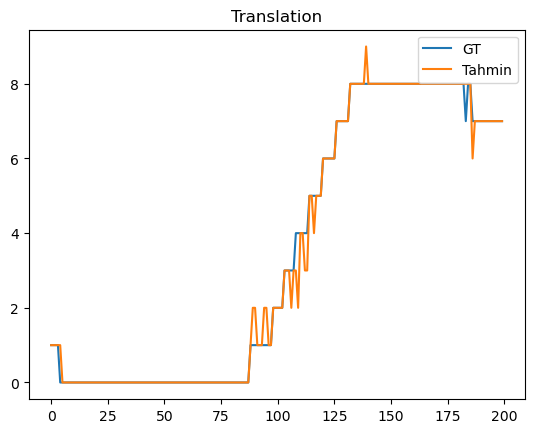

In [109]:
%matplotlib inline
plt.autoscale()
plt.plot(np.argmax(test_label_data['translation'][0:200], axis=1), label="GT")
plt.plot(np.argmax(predictions[0][0:200], axis=1),label="Tahmin")

plt.title("Translation")
plt.legend()
plt.pause(0.0000000001)
plt.show()

In [110]:
%matplotlib qt
fig, axs = plt.subplots(2)
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

start_idx = 0
for i in range(100,len(test_label_data['translation']),100):
    axs[0].cla()
    axs[1].cla()

    axs[0].set_title("Translation")
    axs[0].plot(np.argmax(predictions[0][start_idx:i], axis=1),label="GT")

    axs[1].set_title("With Prediction And GT")
    axs[1].plot(np.argmax(test_label_data['translation'][start_idx:i], axis=1), label="GT")
    axs[1].plot(np.argmax(predictions[0][start_idx:i], axis=1),label="Tahmin")

    start_idx = i
    plt.legend()
    plt.pause(0.0000000001)
    plt.show()

rotasyon tahmin ve ground truth cizdirilmesi

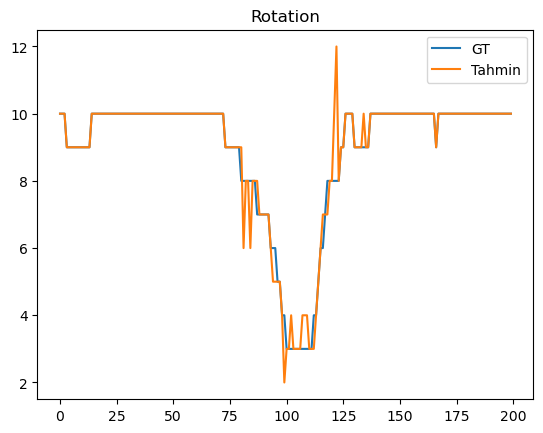

In [111]:
%matplotlib inline
plt.autoscale()
plt.plot(np.argmax(test_label_data['rotation'][0:200], axis=1), label="GT")
plt.plot(np.argmax(predictions[1][0:200], axis=1),label="Tahmin")

plt.title("Rotation")
plt.legend()
plt.pause(0.0000000001)
plt.show()

In [114]:
%matplotlib qt
fig, axs = plt.subplots(2)
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

start_idx = 0
for i in range(100,len(test_label_data['rotation']),100):
    axs[0].cla()
    axs[1].cla()

    axs[0].set_title("Rotation GT")
    axs[0].plot(np.argmax(predictions[1][start_idx:i], axis=1),label="GT")

    axs[1].set_title("With Prediction And GT")
    axs[1].plot(np.argmax(test_label_data['rotation'][start_idx:i], axis=1), label="GT")
    axs[1].plot(np.argmax(predictions[1][start_idx:i], axis=1),label="Tahmin")

    start_idx = i
    plt.legend()
    plt.pause(0.0000000001)
    plt.show()

## Temel CNN Ağı Odometri Artımlı Çizim

Ground truth artımlı çizim

In [115]:
scaler.data_max_, scaler.data_min_

(array([3.01743329, 0.07704157]), array([ 0.28007151, -0.08327863]))

In [116]:
scaleFactor =(scaler.data_max_ - scaler.data_min_) / 21
scaleFactor

array([0.13035056, 0.0076343 ])

In [117]:
minim=scaler.data_min_[0]
binRealValuesMap_T = np.array([0])
for i in range(21):
    binRealValuesMap_T = np.append(binRealValuesMap_T, [minim])
    minim += scaleFactor[0]
binRealValuesMap_T = binRealValuesMap_T[1:]

In [118]:
minim=scaler.data_min_[1]
binRealValuesMap_R = np.array([0])
for i in range(21):
    binRealValuesMap_R = np.append(binRealValuesMap_R, [minim])
    minim += scaleFactor[1]
binRealValuesMap_R = binRealValuesMap_R[1:]

In [119]:
binRealValuesMap_T.shape, binRealValuesMap_R.shape

((21,), (21,))

In [120]:
prediction_odometry = np.array([binRealValuesMap_T[np.argmax(predictions[0], axis=1)], binRealValuesMap_R[np.argmax(predictions[1], axis=1)] ]).transpose()

In [121]:
gt_odometry = np.array([binRealValuesMap_T[np.argmax(test_label_data['translation'], axis=1)], binRealValuesMap_R[np.argmax(test_label_data['rotation'], axis=1)]]).transpose()

In [126]:
prediction_odometry.shape, gt_odometry.shape, predictions[0].shape

((7313, 2), (7313, 2), (7313, 21))

In [123]:
np.min(gt_odometry) < 0

True

In [124]:
%matplotlib qt
x=np.array([0])
y=np.array([0])
z=np.array([0])
yaw=0
fig = plt.figure("test")
ax = fig.add_subplot(projection='3d')
ax.set_title("test")
for i in range(len(prediction_odometry)):
    trans_diff=prediction_odometry[i][0]
    yaw += prediction_odometry[i][1]
    x=np.append(x, [x[-1] + trans_diff*np.cos(yaw)])
    y=np.append(y, [y[-1] + trans_diff*np.sin(yaw)])
    z=np.append(z, [0])

gt_x=np.array([0])
gt_y=np.array([0])
gt_z=np.array([0])
gt_yaw=0
# fig = plt.figure("deneme")
# ax = fig.add_subplot(projection='3d')
# ax.set_title("test")
for i in range(len(gt_odometry)):
    trans_diff=gt_odometry[i][0]
    gt_yaw += gt_odometry[i][1]
    # print(gt_x[-1] , trans_diff, gt_yaw)
    gt_x=np.append(gt_x, [gt_x[-1] + trans_diff*np.cos(gt_yaw)])
    gt_y=np.append(gt_y, [gt_y[-1] + trans_diff*np.sin(gt_yaw)])
    gt_z=np.append(gt_z, [0])
    #gt_yaw += yaw_diff


ax.scatter(gt_x, gt_y, gt_z, marker='o')
ax.scatter(x, y, z, marker='o')


## 0 sequence için odometri çizdirme doğruluk kontrolü

In [136]:
sequence = 0

In [137]:
#windows
binDataset_deneme=readBinDataset(r"D:\Ara\numpy_dataset_sequences\%02d_angleBin.npy" % sequence)

# # linux
# #binDataset=readBinDataset("/mnt/d/Ara/numpy_dataset_sequences/%02d_angleBin.npy" % sequence)

In [139]:
binDataset_deneme=binDataset_deneme.reshape((len(binDataset_deneme), 3601,1 ))

In [140]:
binDataset_deneme = np.array([ consec_frames for consec_frames in zip(binDataset_deneme[0::], binDataset_deneme[1::])])

In [141]:
# windows
posePath = "D:\\Ara\\poses\\"
# # linux
# # posePath = "/mnt/d/Ara/poses/"
poseIdx = "%02d" % sequence
pose = poseIdx + ".txt"

In [142]:
filePath = posePath+pose
file = open(filePath,'r')

In [143]:
def isRotationMatrix(R):
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype=R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6

In [144]:
import math
# from scipy.spatial.transform import Rotation as R

def rotationMatrixToEulerAngles(R):
    assert (isRotationMatrix(R))
    sy = math.sqrt(R[0, 0] * R[0, 0] + R[1, 0] * R[1, 0])
    singular = sy < 1e-6

    if not singular:
        x = math.atan2(R[2, 1], R[2, 2])
        y = math.atan2(-R[2, 0], sy)
        z = math.atan2(R[1, 0], R[0, 0])
    else:
        x = math.atan2(-R[1, 2], R[1, 1])
        y = math.atan2(-R[2, 0], sy)
        z = 0

    return np.array([x, y, z])
    r = R.from_matrix(RMat)
    return r.as_euler('xyz')

In [145]:
def get6DoFPose(line):
    rotationTranslation = line.split()
    #print(rotationTranslation)
    
    
    homogenousCoord = np.array(rotationTranslation, dtype=np.float64).reshape((3,4))
    homogenousCoord = np.append(homogenousCoord, [[0,0,0,1]], axis=0)

    #print(homogenousCoord)
    R = homogenousCoord[0:3,0:3]
    pos = homogenousCoord[0:3,3]
    #print(R , pos)
    
    # assert(1==3)

    
    angles = rotationMatrixToEulerAngles(R)

    return np.concatenate((pos, angles)), homogenousCoord

In [146]:
import pykitti
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

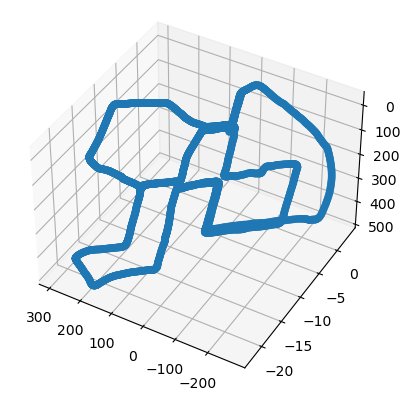

In [147]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x=np.array([])
y=np.array([])
z=np.array([])
yaw=np.array([])

basedir = 'D:\\dataset\\'
sequence_ = '%02d' % sequence
dataset = pykitti.odometry(basedir, sequence_)
for i in range(len(dataset.poses)):
    x=np.append(x,[dataset.poses[i][0][3]])
    y=np.append(y,[dataset.poses[i][1][3]])
    z=np.append(z,[dataset.poses[i][2][3]])

ax.scatter(x, y, z, marker='o')

t_xyz = np.c_[x,y,z]
ax.view_init(-140, 60)

plt.show()

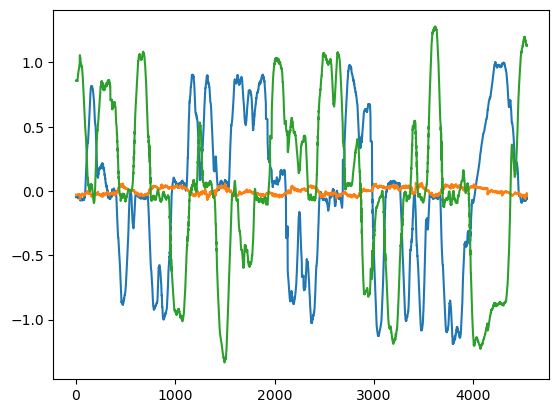

In [148]:
dt_xyz = t_xyz[1:] - t_xyz[0:-1]
plt.plot(dt_xyz)

0.81988264295328

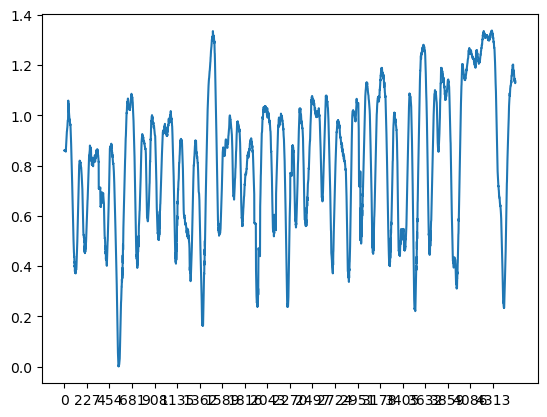

In [150]:
translation = np.sqrt( dt_xz[:,0]** 2 +  dt_xz[:,1]**2)
plt.xticks(range(0, len(translation),int(len(translation)/20)))
plt.plot(translation)
np.mean(translation)

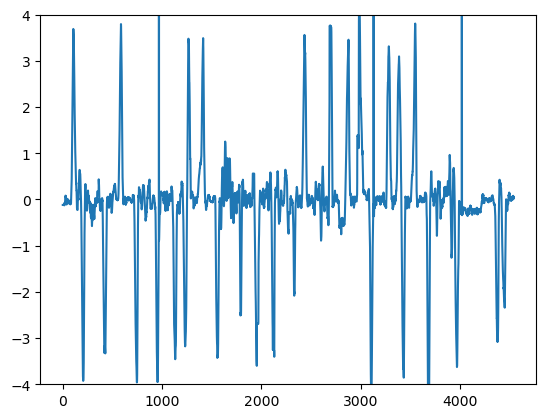

In [152]:
fig1 = plt.figure()
# arrow = plt.axes()
yaw_=np.zeros(len(dataset.poses))
for i in range(len(dataset.poses)):
    r= R.from_matrix([[dataset.poses[i][0][0], dataset.poses[i][0][1], dataset.poses[i][0][2]], [dataset.poses[i][1][0], dataset.poses[i][1][1], dataset.poses[i][1][2]], [dataset.poses[i][2][0], dataset.poses[i][2][1], dataset.poses[i][2][2]]])
    yaw=-r.as_rotvec()[1]
    yaw_[i]=yaw
    # arrow.arrow(x[i], y[i], math.sin(yaw), math.cos(yaw), head_width=0.05, head_length=0.1, fc='k', ec='k')
# plt.plot(np.rad2deg(yaw_))

diff_pitch = (yaw_[1::]-yaw_[:-1:])

# outlier detection
idxs = np.where((diff_pitch>np.deg2rad(300)))

diff_pitch[idxs] =  diff_pitch[idxs] - np.deg2rad(360)  * np.sign(diff_pitch[idxs])

diff_pitch = -diff_pitch
plt.plot((np.rad2deg(diff_pitch)))
plt.ylim([-4, 4])
plt.show()

In [174]:
label_deneme = np.array((translation,diff_pitch))
label_deneme = label_deneme.transpose()
binDataset_deneme.shape, label_deneme.shape

((4540, 2, 3601, 1), (4540, 2))

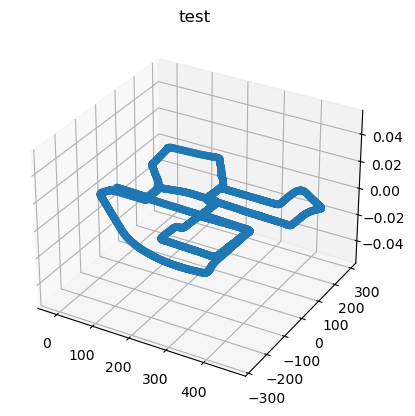

In [171]:
x=np.array([0])
y=np.array([0])
z=np.array([0])
yaw=0
fig = plt.figure("test")
ax = fig.add_subplot(projection='3d')
ax.set_title("test")
for i in range(len(label_deneme)):
    trans_diff=label_deneme[i][0]
    yaw += label_deneme[i][1]
    x=np.append(x, [x[-1] + trans_diff*np.cos(yaw)])
    y=np.append(y, [y[-1] + trans_diff*np.sin(yaw)])
    z=np.append(z, [0])

ax.scatter(x, y, z, marker='o')


# GAZEBODAN ELDE EDILEN VERI ILE EĞITME

## Gazebodan çekilen verisetinin kontrol edilmesi

In [222]:
dataset2read = 3

In [223]:
binDataset_gazebo=readBinDataset(rf"D:\Ara\numpy_dataset_sequences_gazebo\{dataset2read}_angleBin.npy")

In [224]:
binDataset_gazebo_laser = binDataset_gazebo.item().get('lidarDataset')
binDataset_gazebo_label = binDataset_gazebo.item().get('labelDataset')

In [259]:
infinite_mask = np.array([np.inf]*3601)

In [260]:
is_corrupted_sequence = np.all(binDataset_gazebo_laser[0] == infinite_mask)
if is_corrupted_sequence is not True:
    dataset2read += 1
    binDataset_gazebo=readBinDataset(rf"D:\Ara\numpy_dataset_sequences_gazebo\{dataset2read}_angleBin.npy")
    binDataset_gazebo_laser = binDataset_gazebo.item().get('lidarDataset')
    binDataset_gazebo_label = binDataset_gazebo.item().get('labelDataset')[1:]

In [262]:
binDataset_gazebo_laser=np.array([binDataset_gazebo_laser[:-1],binDataset_gazebo_laser[1:]])
binDataset_gazebo_laser=np.einsum("ijk->jik",binDataset_gazebo_laser)

In [264]:
binDataset_gazebo_laser.shape, binDataset_gazebo_label.shape

((545, 2, 3601), (545, 2))

In [ ]:
binDataset_[0].shape, label_[0].shape

In [228]:
is_corrupted_sequence = np.all(binDataset_gazebo_laser[0] == infinite_mask)
is_corrupted_sequence

False

In [229]:
def plotAngleBin(ax,angleBin):
    ax.cla()
    ax.scatter(0,0)
    xList = []
    yList = []
    for angle, bin in enumerate(angleBin):
        if bin > 0:
            y=bin*np.sin(np.deg2rad(angle*0.1))
            x=bin*np.cos(np.deg2rad(angle*0.1))
            xList.append(x)
            yList.append(y)
            # ax.scatter(x,y)
    ax.scatter(xList,yList)
    plt.pause(0.00000000000001)
    plt.show()

In [230]:
%matplotlib qt
# %matplotlib inline
fig, axs = plt.subplots(2)
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

for i in range(len(binDataset_gazebo_laser)-1):
    fig.suptitle("Örnek Sequence Verisi")
    text = fig.text(0.05, 0.05,"translation:{translation} rotation:{rotation} ".format(translation=binDataset_gazebo_label[i][0], rotation=binDataset_gazebo_label[i][1]))
    plotAngleBin(axs[0], binDataset_gazebo_laser[i])
    
    plotAngleBin(axs[1], binDataset_gazebo_laser[i+1])
    text.remove()
    
    # print(example_bin_input_time_distributed[i][0] == example_bin_input_time_distributed[i][1])


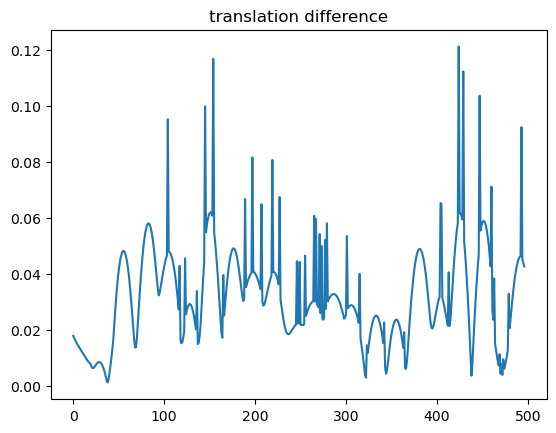

In [231]:
%matplotlib inline
plt.title("translation difference")
plt.plot(binDataset_gazebo_label[:,0])

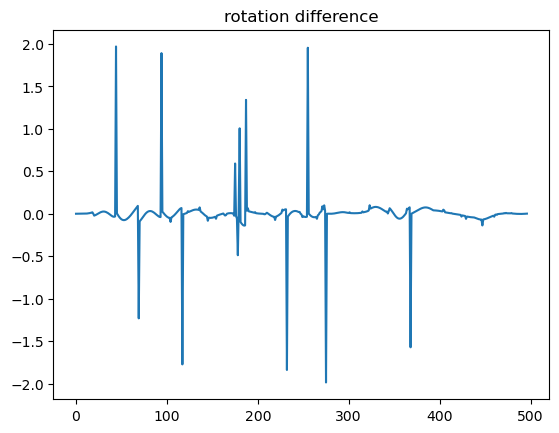

In [232]:
%matplotlib inline
plt.title("rotation difference")
plt.plot(binDataset_gazebo_label[:,1])

(array([  1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   4.,   5.,  39., 113., 231.,  71.,  22.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.]),
 array([-1.98730712, -1.94773652, -1.90816591, -1.86859531, -1.82902471,
        -1.7894541 , -1.7498835 , -1.71031289, -1.67074229, -1.63117169,
        -1.59160108, -1.55203048, -1.51245988, -1.47288927, -1.43331867,
        -1.39374807, -1.35417746, -1.31460686, -1.27503625, -1.23546565,
        -1.19589505, -1.15

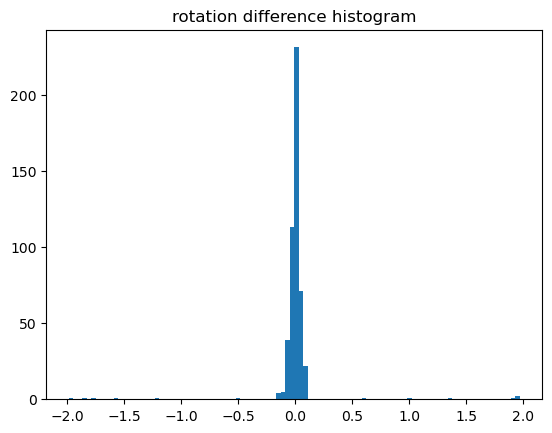

In [235]:
%matplotlib inline
plt.title("rotation difference histogram")
plt.hist(binDataset_gazebo_label[:,1], bins=100)

(array([ 5.,  9., 25., 16., 13., 17., 18., 19., 37., 31., 25., 36., 28.,
        22., 17., 23., 24., 21., 23., 27.,  5.,  6.,  9., 12.,  9.,  5.,
         3.,  2.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([0.00137332, 0.00377117, 0.00616902, 0.00856688, 0.01096473,
        0.01336258, 0.01576044, 0.01815829, 0.02055614, 0.022954  ,
        0.02535185, 0.0277497 , 0.03014755, 0.03254541, 0.03494326,
        0.03734111, 0.03973897, 0.04213682, 0.04453467, 0.04693253,
        0.04933038, 0.05172823, 0.05412608, 0.05652394, 0.05892179,
        0.06131964, 0.0637175 , 0.06611535, 0.0685132 , 0.07091106,
        0.07330891, 0.07570676, 0.07810461, 0.08050247, 0.08290032,
        0.08529817, 0.08769603, 0.09009388, 0.09249173, 0.09488959,
        0.09728744, 0.09968529, 0.10208314, 0.104481  , 0.10687885,
        0.1092767 , 0.11167456, 0.11407241, 0.11647026, 0.11886812,
        0.12126597]),
 <BarContainer

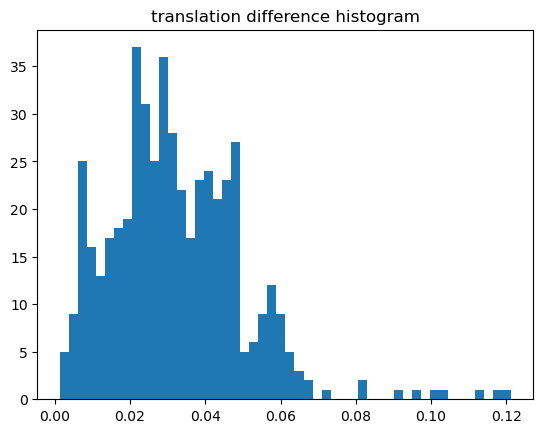

In [236]:
%matplotlib inline
plt.title("translation difference histogram")
plt.hist(binDataset_gazebo_label[:,0], bins=50)

In [237]:
binDataset_gazebo_label[i][0]

0.044203915938584554

In [238]:
#windows
for sequence in range(total_dataset_sz):
    binDataset_.append(readBinDataset(r"D:\Ara\numpy_dataset_sequences\%02d_angleBin.npy" % sequence))
    binDataset_[sequence]=binDataset_[sequence].reshape((len(binDataset_[sequence]), 3601,1 ))
    binDataset_[sequence] = np.array([ consec_frames for consec_frames in zip(binDataset_[sequence][0::], binDataset_[sequence][1::])])

# linux
#binDataset=readBinDataset("/mnt/d/Ara/numpy_dataset_sequences/%02d_angleBin.npy" % sequence)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

# Odometri Sonucunu Çizdir

# Modeli Ubuntuya Göndermek İçin Kaydet

# Laser verisini gazebodan al

# Laser verisini kutula ve modele değerlendirme olarak at

# Çıkan sonuçtan artımlı odometri çiz

# Deterministik Modeli Kur ve Karşılaştır